In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

group1 = [10,11,12,13]
group2 = [15,16,17,18]
group3 = [19,20,21]
group4 = [24,25,28,29]
allGroups = group1+group2+group3+group4

bookings = pd.read_json("../ec_data/all_bookings27-7-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,4,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

allBookings = validBookings.loc[validBookings['user'].isin(allGroups)].copy()  

allBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00
35,2023-04-21 17:00:00+00:00,1800,oven (the oven is on and also the computer and...,,no,0.78,11,electricity_consumption,12,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00
36,2023-04-22 14:00:00+00:00,3600,dishwasher,this may not be necessary depends on how full...,yes,0.12,11,electricity_consumption,12,2023-04-21 08:47:31+00:00,2023-04-21 08:47:31+00:00
37,2023-04-21 13:00:00+00:00,5400,oven (Cooking supper for tonight but using the...,Booked when oven was already on as Sarah forg...,no,1.05,8,electricity_consumption,10,2023-04-21 12:06:09+00:00,2023-04-21 12:06:09+00:00
38,2023-04-21 15:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,More weekend preparation!,no,0.50,8,electricity_consumption,10,2023-04-21 14:54:01+00:00,2023-04-21 14:54:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...
322,2023-07-27 13:00:00+00:00,1800,oven (30min),,yes,0.40,16,electricity_consumption,28,2023-07-24 12:54:19+00:00,2023-07-24 12:54:19+00:00
323,2023-07-24 17:00:00+00:00,3600,oven (60min),,yes,0.20,8,electricity_consumption,25,2023-07-24 14:29:42+00:00,2023-07-24 14:29:42+00:00
324,2023-07-25 09:30:00+00:00,5400,Other,Cooking (hob). I don't know how many kWh this ...,yes,1.00,2,electricity_consumption,24,2023-07-25 06:33:11+00:00,2023-07-25 06:33:11+00:00
325,2023-07-25 17:00:00+00:00,1800,oven (30min),,yes,0.08,8,electricity_consumption,25,2023-07-25 08:34:41+00:00,2023-07-25 08:34:41+00:00


266 bookings were made in total.
42 of those bookings were modified.


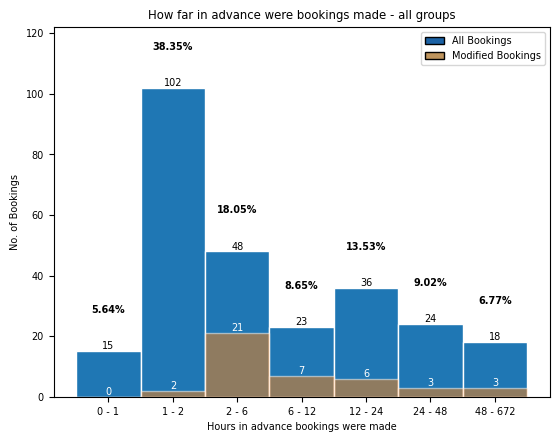

In [78]:
# Booking pattern for all groups

# How far in advance were bookings made?

# Also shows how many bookings were modified

allBookings['diff'] = (allBookings['start'] - allBookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(allBookings['diff'],bins)

# make modified bookings histogram
modified_bookings = allBookings['diff'].where(allBookings['modified_at'] > allBookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - all groups")

# Create legend
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(allBookings)
print(total_bookings, 'bookings were made in total.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 12, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [ ]:
#Group 1 Analysis - Users 10,11,12,13

In [80]:
g1W1StartDate = datetime.datetime(2023,3,28,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g1W1EndDate = datetime.datetime(2023,4,27,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g1W2StartDate = datetime.datetime(2023,4,28,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g1W2EndDate = datetime.datetime(2023,5,4,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g1W3StartDate = datetime.datetime(2023,5,5,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g1W3EndDate = datetime.datetime(2023,5,13,0,0,0,0,tzinfo=pytz.timezone('UTC'))

In [4]:
# User 10

bookingsUser10 = bookings.loc[bookings['user'] == 10].copy()

bookingsUser10

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
19,2023-04-02 08:00:00+00:00,1800,lighting (We are in the kitchen. It is getting...,,no,0.15,8,electricity_consumption,10,2023-03-29 17:47:00+00:00,2023-03-29 17:47:00+00:00
24,2023-04-07 09:00:00+00:00,3600,\n Activity Type\n ...,Hoovering. It's a Friday thing! Probably for 3...,yes,1.00,8,electricity_consumption,10,2023-04-07 08:01:49+00:00,2023-04-07 08:01:49+00:00
31,2023-04-08 08:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,,somewhat,0.50,8,electricity_consumption,10,2023-04-08 07:44:18+00:00,2023-04-08 07:44:18+00:00
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00
37,2023-04-21 13:00:00+00:00,5400,oven (Cooking supper for tonight but using the...,Booked when oven was already on as Sarah forg...,no,1.05,8,electricity_consumption,10,2023-04-21 12:06:09+00:00,2023-04-21 12:06:09+00:00
38,2023-04-21 15:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,More weekend preparation!,no,0.50,8,electricity_consumption,10,2023-04-21 14:54:01+00:00,2023-04-21 14:54:01+00:00
39,2023-04-22 09:00:00+00:00,5400,dishwasher (This is the end of the dishwasher ...,,no,0.50,8,electricity_consumption,10,2023-04-22 08:12:14+00:00,2023-04-22 08:12:14+00:00
47,2023-04-24 14:00:00+00:00,7200,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8,electricity_consumption,10,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00
50,2023-04-25 10:15:00+00:00,5400,washing_and_drying (The is the washing machine...,,no,0.78,8,electricity_consumption,10,2023-04-25 10:00:31+00:00,2023-04-25 10:00:31+00:00
51,2023-04-25 16:00:00+00:00,3600,meal_dinner,,no,0.94,8,electricity_consumption,10,2023-04-25 10:02:05+00:00,2023-04-25 10:02:05+00:00


31 bookings were made by User 10.
9 of those bookings were modified.


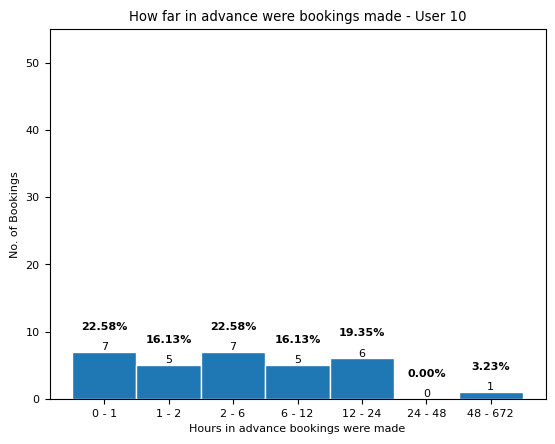

In [5]:
# Booking pattern for User 10

# How far in advance was a booking made in hours?
bookingsUser10['diff'] = (bookingsUser10['start'] - bookingsUser10['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 8})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser10['diff'],bins)

# make modified bookings histogram
modified_bookings_user_10 = bookingsUser10['diff'].where(bookingsUser10['modified_at'] > bookingsUser10['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_10, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 10")

# Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser10)
print(total_bookings, 'bookings were made by User 10.')
print(modified_bookings_user_10.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 10 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 10
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_10_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
19,2023-04-02 08:00:00+00:00,1800,lighting (We are in the kitchen. It is getting...,,no,0.15,8,electricity_consumption,10,2023-03-29 17:47:00+00:00,2023-03-29 17:47:00+00:00,86.216667
24,2023-04-07 09:00:00+00:00,3600,\n Activity Type\n ...,Hoovering. It's a Friday thing! Probably for 3...,yes,1.00,8,electricity_consumption,10,2023-04-07 08:01:49+00:00,2023-04-07 08:01:49+00:00,0.969722
31,2023-04-08 08:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,,somewhat,0.50,8,electricity_consumption,10,2023-04-08 07:44:18+00:00,2023-04-08 07:44:18+00:00,0.261667
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,3.237778
37,2023-04-21 13:00:00+00:00,5400,oven (Cooking supper for tonight but using the...,Booked when oven was already on as Sarah forg...,no,1.05,8,electricity_consumption,10,2023-04-21 12:06:09+00:00,2023-04-21 12:06:09+00:00,0.897500
38,2023-04-21 15:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,More weekend preparation!,no,0.50,8,electricity_consumption,10,2023-04-21 14:54:01+00:00,2023-04-21 14:54:01+00:00,0.099722
39,2023-04-22 09:00:00+00:00,5400,dishwasher (This is the end of the dishwasher ...,,no,0.50,8,electricity_consumption,10,2023-04-22 08:12:14+00:00,2023-04-22 08:12:14+00:00,0.796111
47,2023-04-24 14:00:00+00:00,7200,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8,electricity_consumption,10,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00,4.301111
50,2023-04-25 10:15:00+00:00,5400,washing_and_drying (The is the washing machine...,,no,0.78,8,electricity_consumption,10,2023-04-25 10:00:31+00:00,2023-04-25 10:00:31+00:00,0.241389
51,2023-04-25 16:00:00+00:00,3600,meal_dinner,,no,0.94,8,electricity_consumption,10,2023-04-25 10:02:05+00:00,2023-04-25 10:02:05+00:00,5.965278


11 bookings were made by User 10 in the first week.


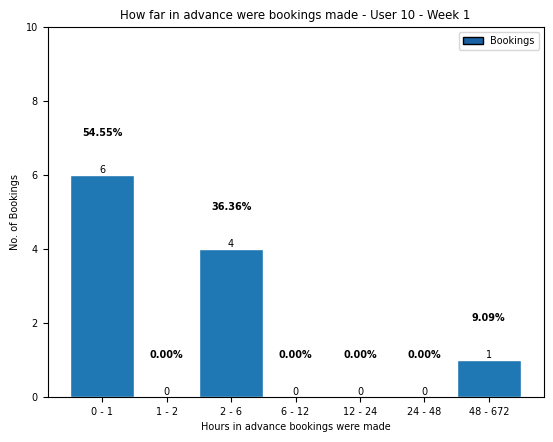

In [88]:
# Booking pattern for User 10 - Week 1

bookingsUser10Week1 = bookingsUser10[(bookingsUser10['created_at'] > g1W1StartDate) & (bookingsUser10['created_at'] < g1W2StartDate)]
display(bookingsUser10Week1)

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser10Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 10 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser10Week1)
print(total_bookings, 'bookings were made by User 10 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
57,2023-04-28 13:00:00+00:00,5400,dishwasher (This is the end of the dishwasher ...,,somewhat,0.50,8,electricity_consumption,10,2023-04-28 07:18:43+00:00,2023-04-28 05:16:29+00:00,7.725278
61,2023-04-29 10:00:00+00:00,3600,meal_dinner,This is for using the vacuum cleaner but it w...,yes,0.94,8,electricity_consumption,10,2023-04-28 16:42:44+00:00,2023-04-28 15:41:05+00:00,18.315278
66,2023-04-29 11:00:00+00:00,7200,washing_and_drying (Breakfast. Kettle. Toaster.),,somewhat,1.13,8,electricity_consumption,10,2023-04-29 10:27:26+00:00,2023-04-29 10:27:26+00:00,0.542778
78,2023-04-30 12:00:00+00:00,3600,oven (Baking),,no,0.70,8,electricity_consumption,10,2023-04-30 10:19:36+00:00,2023-04-30 10:19:36+00:00,1.673333
83,2023-04-30 13:00:00+00:00,1800,toaster (Afternoon snack before working at lap...,need an extra 30 minutes on oven,no,0.23,8,electricity_consumption,10,2023-04-30 11:57:13+00:00,2023-04-30 11:57:13+00:00,1.046389
91,2023-05-01 19:00:00+00:00,1800,toaster (Afternoon snack before working at lap...,it's actually the oven not the toaster,no,0.23,8,electricity_consumption,10,2023-05-01 17:26:43+00:00,2023-05-01 17:26:43+00:00,1.554722
92,2023-05-02 11:00:00+00:00,7200,washing_and_drying (Breakfast. Kettle. Toaster.),,yes,1.13,8,electricity_consumption,10,2023-05-01 17:29:49+00:00,2023-05-01 17:29:49+00:00,17.503056
93,2023-05-02 14:00:00+00:00,5400,dishwasher (This is the end of the dishwasher ...,,yes,0.50,8,electricity_consumption,10,2023-05-01 17:30:21+00:00,2023-05-01 17:30:21+00:00,20.494167
94,2023-05-02 14:00:00+00:00,5400,dishwasher (This is the end of the dishwasher ...,,yes,0.50,8,electricity_consumption,10,2023-05-01 17:30:25+00:00,2023-05-01 17:30:25+00:00,20.493056
100,2023-05-03 18:00:00+00:00,1800,toaster (Afternoon snack before working at lap...,Using oven but no activity option,no,0.23,8,electricity_consumption,10,2023-05-03 16:33:38+00:00,2023-05-03 16:33:38+00:00,1.439444


11 bookings were made by User 10 in the second week.


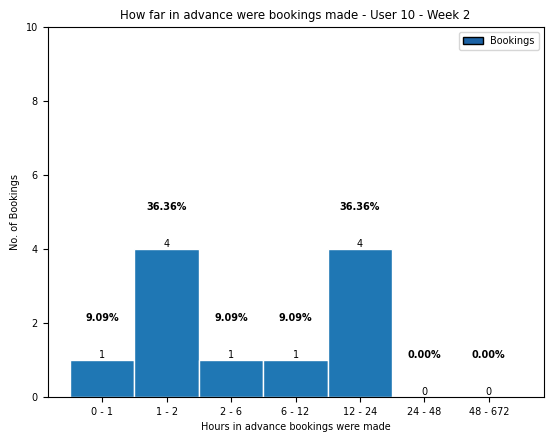

In [89]:
# Booking pattern for User 10 - Week 2

bookingsUser10Week2 = bookingsUser10[(bookingsUser10['created_at'] >= g1W2StartDate) & (bookingsUser10['created_at'] < g1W3StartDate)]
display(bookingsUser10Week2)

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser10Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 10 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser10Week2)
print(total_bookings, 'bookings were made by User 10 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

9 bookings were made by User 10 in the third week.


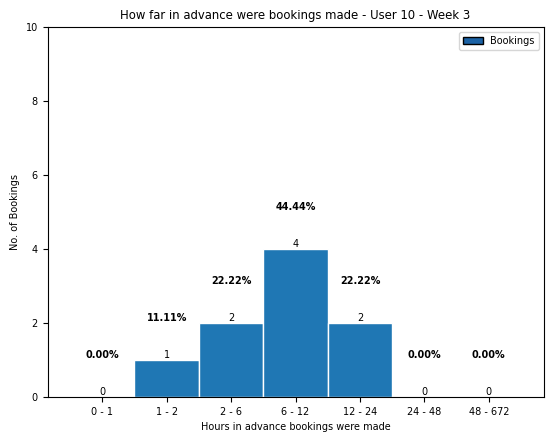

In [90]:
# Booking pattern for User 10 - Week 3

bookingsUser10Week3 = bookingsUser10[(bookingsUser10['created_at'] >= g1W3StartDate) & (bookingsUser10['created_at'] <= g1W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser10Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 10 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser10Week3)
print(total_bookings, 'bookings were made by User 10 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [6]:
# User 11

bookingsUser11 = bookings.loc[bookings['user'] == 11].copy()
bookingsUser11

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
29,2023-04-07 12:10:00+00:00,7200,Other,,yes,1.00,10,electricity_consumption,11,2023-04-07 12:00:40+00:00,2023-04-07 12:00:40+00:00
40,2023-04-22 09:00:00+00:00,1800,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-04-22 08:41:53+00:00,2023-04-22 08:41:53+00:00
41,2023-04-22 11:20:00+00:00,7200,oven (baking),,no,0.46,10,electricity_consumption,11,2023-04-22 08:43:48+00:00,2023-04-22 08:43:48+00:00
45,2023-04-23 13:15:00+00:00,7200,oven (baking),actually charging my van and not baking,somewhat,0.46,10,electricity_consumption,11,2023-04-23 12:13:16+00:00,2023-04-23 12:13:16+00:00
46,2023-04-23 15:00:00+00:00,1800,washing_and_drying,,somewhat,0.29,10,electricity_consumption,11,2023-04-23 14:15:02+00:00,2023-04-23 14:15:02+00:00
49,2023-04-25 08:00:00+00:00,7200,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-04-25 07:04:19+00:00,2023-04-25 07:04:19+00:00
52,2023-04-25 16:00:00+00:00,10800,oven (baking),charging van - not baking!,no,0.75,10,electricity_consumption,11,2023-04-25 15:52:11+00:00,2023-04-25 15:52:11+00:00
56,2023-04-27 13:00:00+00:00,10800,oven (baking),EC charging,no,0.75,10,electricity_consumption,11,2023-04-27 12:44:42+00:00,2023-04-27 12:44:42+00:00
60,2023-04-28 15:30:00+00:00,1800,oven (baking),,yes,0.46,10,electricity_consumption,11,2023-04-28 15:27:09+00:00,2023-04-28 12:26:11+00:00
62,2023-04-29 12:15:00+00:00,3600,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-04-29 08:20:37+00:00,2023-04-29 06:19:59+00:00


33 bookings were made by User 11.
10 of those bookings were modified.


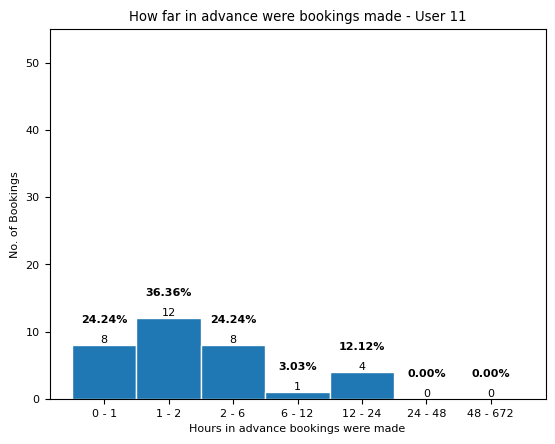

In [44]:
# Booking pattern for User 11 - Overview

# How far in advance was a booking made in hours?
bookingsUser11['diff'] = (bookingsUser11['start'] - bookingsUser11['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 8})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser11['diff'],bins)

# make modified bookings histogram
modified_bookings_user_11 = bookingsUser11['diff'].where(bookingsUser11['modified_at'] > bookingsUser11['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_11, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 11")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser11)
print(total_bookings, 'bookings were made by User 11.')
print(modified_bookings_user_11.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 11 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 11
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_11_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
29,2023-04-07 12:10:00+00:00,7200,Other,,yes,1.00,10,electricity_consumption,11,2023-04-07 12:00:40+00:00,2023-04-07 12:00:40+00:00,0.155556
40,2023-04-22 09:00:00+00:00,1800,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-04-22 08:41:53+00:00,2023-04-22 08:41:53+00:00,0.301944
41,2023-04-22 11:20:00+00:00,7200,oven (baking),,no,0.46,10,electricity_consumption,11,2023-04-22 08:43:48+00:00,2023-04-22 08:43:48+00:00,2.603333
45,2023-04-23 13:15:00+00:00,7200,oven (baking),actually charging my van and not baking,somewhat,0.46,10,electricity_consumption,11,2023-04-23 12:13:16+00:00,2023-04-23 12:13:16+00:00,1.028889
46,2023-04-23 15:00:00+00:00,1800,washing_and_drying,,somewhat,0.29,10,electricity_consumption,11,2023-04-23 14:15:02+00:00,2023-04-23 14:15:02+00:00,0.749444
49,2023-04-25 08:00:00+00:00,7200,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-04-25 07:04:19+00:00,2023-04-25 07:04:19+00:00,0.928056
52,2023-04-25 16:00:00+00:00,10800,oven (baking),charging van - not baking!,no,0.75,10,electricity_consumption,11,2023-04-25 15:52:11+00:00,2023-04-25 15:52:11+00:00,0.130278
56,2023-04-27 13:00:00+00:00,10800,oven (baking),EC charging,no,0.75,10,electricity_consumption,11,2023-04-27 12:44:42+00:00,2023-04-27 12:44:42+00:00,0.255000


8 bookings were made by User 11 in the first week.


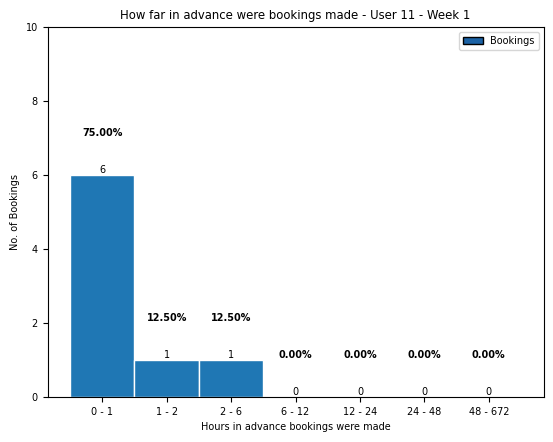

In [97]:
# Booking pattern for User 11 - Week 1

bookingsUser11Week1 = bookingsUser11[(bookingsUser11['created_at'] >= g1W1StartDate) & (bookingsUser11['created_at'] < g1W2StartDate)]
display(bookingsUser11Week1)

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser11Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 11 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser11Week1)
print(total_bookings, 'bookings were made by User 11 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

13 bookings were made by User 11 in the second week.


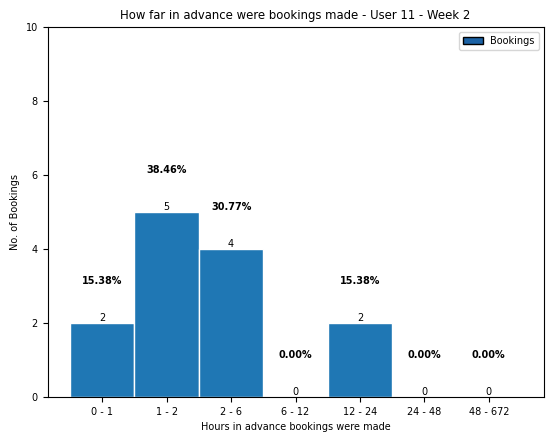

In [96]:
# Booking pattern for User 11 - Week 2

bookingsUser11Week2 = bookingsUser11[(bookingsUser11['created_at'] >= g1W2StartDate) & (bookingsUser11['created_at'] <= g1W2EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser11Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 11 - Week 2")

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser11Week2)
print(total_bookings, 'bookings were made by User 11 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
105,2023-05-05 10:00:00+00:00,9000,dishwasher (What??),,no,0.44,10,electricity_consumption,11,2023-05-05 08:16:36+00:00,2023-05-05 08:16:36+00:00,1.723333
106,2023-05-05 10:00:00+00:00,3600,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-05-05 08:17:09+00:00,2023-05-05 08:17:09+00:00,1.714167
107,2023-05-05 16:30:00+00:00,1800,oven (baking),,no,0.75,10,electricity_consumption,11,2023-05-05 15:29:36+00:00,2023-05-05 11:28:22+00:00,5.027222
109,2023-05-07 09:00:00+00:00,14400,other (charging EV &amp; using hob),ev,yes,1.38,10,electricity_consumption,11,2023-05-06 16:43:14+00:00,2023-05-06 16:43:14+00:00,16.279444
111,2023-05-08 09:30:00+00:00,5400,Other,,no,1.00,10,electricity_consumption,11,2023-05-08 08:23:30+00:00,2023-05-08 08:23:30+00:00,1.108333
112,2023-05-08 10:20:00+00:00,10800,dishwasher,,no,0.17,10,electricity_consumption,11,2023-05-08 09:19:27+00:00,2023-05-08 09:19:27+00:00,1.009167
121,2023-05-10 16:00:00+00:00,1800,oven (baking),,no,0.75,10,electricity_consumption,11,2023-05-10 15:52:24+00:00,2023-05-10 14:51:58+00:00,1.133889
122,2023-05-11 09:00:00+00:00,9000,dishwasher,,no,0.17,10,electricity_consumption,11,2023-05-10 21:13:56+00:00,2023-05-10 19:13:18+00:00,13.778333
123,2023-05-11 11:00:00+00:00,3600,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-05-11 06:43:13+00:00,2023-05-11 03:42:38+00:00,7.289444
137,2023-05-12 09:00:00+00:00,7200,dishwasher (30min),,no,0.44,10,electricity_consumption,11,2023-05-12 07:44:33+00:00,2023-05-12 07:44:33+00:00,1.257500


12 bookings were made by User 11 in the third week.


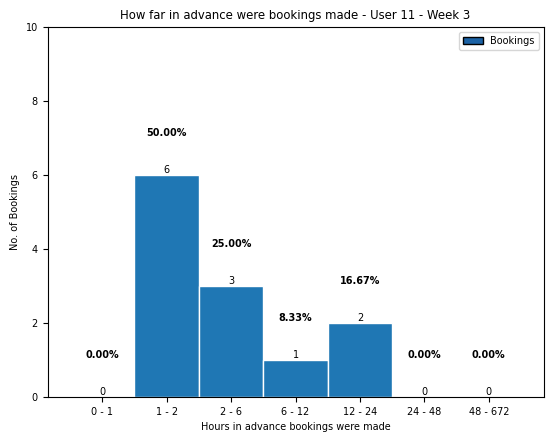

In [95]:
# Booking pattern for User 11 - Week 3

bookingsUser11Week3 = bookingsUser11[(bookingsUser11['created_at'] > g1W2EndDate) & (bookingsUser11['created_at'] < g1W3EndDate)]
display(bookingsUser11Week3) 
    
plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser11Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 11 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser11Week3)
print(total_bookings, 'bookings were made by User 11 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)


plt.show()

In [8]:
# User 12

bookingsUser12 = bookings.loc[bookings['user'] == 12].copy()
bookingsUser12

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
25,2023-04-08 15:00:00+00:00,16200,oven (the oven is on and also the computer and...,roasting half a leg of lamb slowly,yes,0.78,11,electricity_consumption,12,2023-04-07 11:18:54+00:00,2023-04-07 10:13:53+00:00
26,2023-04-07 12:08:00+00:00,5400,washing_and_drying,making use of sun to dry clothes,no,0.26,11,electricity_consumption,12,2023-04-07 11:22:13+00:00,2023-04-07 07:20:53+00:00
27,2023-04-08 15:00:00+00:00,18000,oven (the oven is on and also the computer and...,roasting half a lamb,yes,0.78,11,electricity_consumption,12,2023-04-07 11:23:47+00:00,2023-04-07 11:23:47+00:00
28,2023-04-08 15:00:00+00:00,14400,oven (BREAD MAKING AND QUICHE ),Moved to 4pm to see if that helps but need to...,no,1.45,11,electricity_consumption,12,2023-04-07 11:40:40+00:00,2023-04-07 11:40:40+00:00
30,2023-04-08 10:00:00+00:00,3600,dishwasher,,yes,0.12,11,electricity_consumption,12,2023-04-08 05:33:49+00:00,2023-04-08 05:33:49+00:00
35,2023-04-21 17:00:00+00:00,1800,oven (the oven is on and also the computer and...,,no,0.78,11,electricity_consumption,12,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00
36,2023-04-22 14:00:00+00:00,3600,dishwasher,this may not be necessary depends on how full...,yes,0.12,11,electricity_consumption,12,2023-04-21 08:47:31+00:00,2023-04-21 08:47:31+00:00
42,2023-04-22 11:00:00+00:00,1800,washing_and_drying,just checked and there is space for me to do ...,somewhat,0.26,11,electricity_consumption,12,2023-04-22 10:57:48+00:00,2023-04-22 10:57:48+00:00
43,2023-04-22 16:00:00+00:00,5400,oven (the oven is on and also the computer and...,,somewhat,0.78,11,electricity_consumption,12,2023-04-22 11:02:50+00:00,2023-04-22 09:58:55+00:00
44,2023-04-23 18:00:00+00:00,5400,oven (the oven is on and also the computer and...,evening roast,somewhat,0.78,11,electricity_consumption,12,2023-04-22 11:00:48+00:00,2023-04-22 11:00:48+00:00


20 bookings were made by User 12.
3 of those bookings were modified.


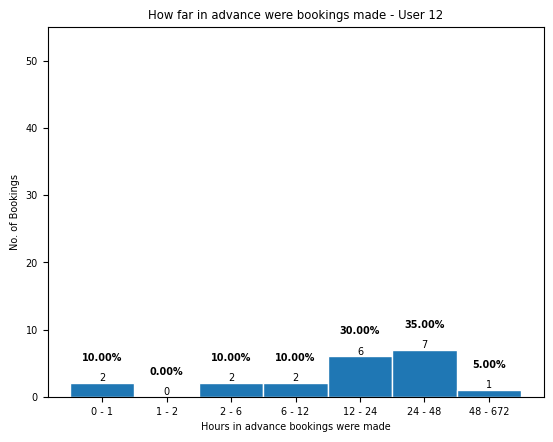

In [43]:
# Booking pattern for User 12

# How far in advance was a booking made in hours?
bookingsUser12['diff'] = (bookingsUser12['start'] - bookingsUser12['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser12['diff'],bins)

# make modified bookings histogram
modified_bookings_user_12 = bookingsUser12['diff'].where(bookingsUser12['modified_at'] > bookingsUser12['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_12, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 12")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser12)
print(total_bookings, 'bookings were made by User 12.')
print(modified_bookings_user_12.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 12 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 12
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_12_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

13 bookings were made by User 12 in the first week.


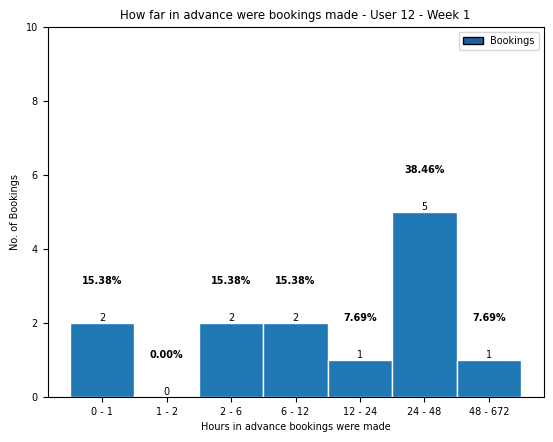

In [101]:
# Booking pattern for User 12 - Week 1

bookingsUser12Week1 = bookingsUser12[(bookingsUser12['created_at'] >= g1W1StartDate) & (bookingsUser12['created_at'] <= g1W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser12Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 12 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser12Week1)
print(total_bookings, 'bookings were made by User 12 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

7 bookings were made by User 12 in the second week.


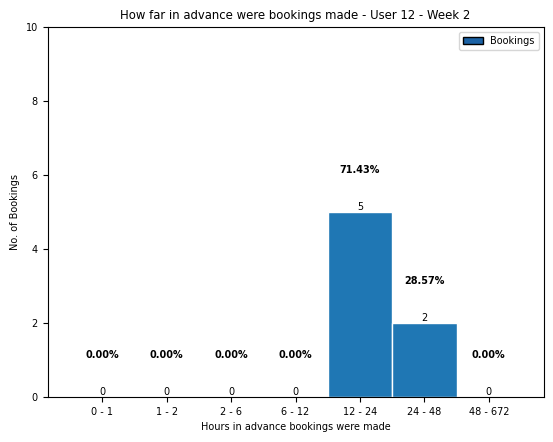

In [102]:
# Booking pattern for User 12 - Week 2

bookingsUser12Week2 = bookingsUser12[(bookingsUser12['created_at'] >= g1W2StartDate) & (bookingsUser12['created_at'] <= g1W2EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser12Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 12 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser12Week2)
print(total_bookings, 'bookings were made by User 12 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

0 bookings were made by User 12 in the third week.


/var/folders/8_/t19tfm1d4gj320q9vpfcj_dr0000gn/T/ipykernel_25106/1185838680.py:48: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (height / total_bookings) * 100


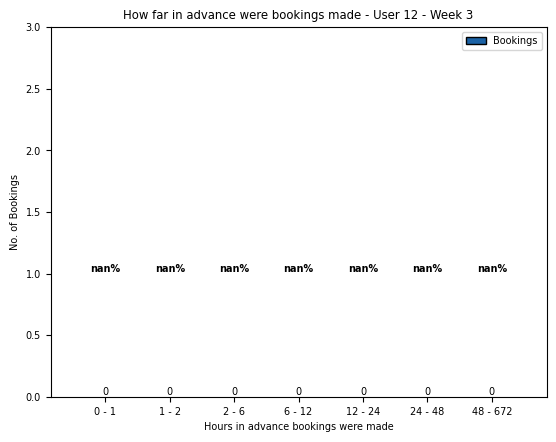

In [27]:
# Booking pattern for User 12 - Week 3

bookingsUser12Week3 = bookingsUser12[(bookingsUser12['created_at'] >= g1W3StartDate) & (bookingsUser12['created_at'] <= g1W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser12Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 12 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser12Week3)
print(total_bookings, 'bookings were made by User 12 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [10]:
# User 13

bookingsUser13 = bookings.loc[bookings['user'] == 13].copy()
bookingsUser13

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
65,2023-04-29 11:30:00+00:00,3600,washing_and_drying,,no,0.65,12,electricity_consumption,13,2023-04-29 10:26:19+00:00,2023-04-29 10:26:19+00:00
69,2023-04-29 16:00:00+00:00,1800,showering_and_hair-drying,31 shower,no,0.44,12,electricity_consumption,13,2023-04-29 15:54:04+00:00,2023-04-29 15:54:04+00:00
80,2023-04-30 14:00:00+00:00,9000,dishwasher,31 dishwasher,somewhat,1.06,12,electricity_consumption,13,2023-04-30 10:59:07+00:00,2023-04-30 10:59:07+00:00
81,2023-04-30 13:00:00+00:00,3600,washing_and_drying,31 washing,somewhat,0.65,12,electricity_consumption,13,2023-04-30 11:22:21+00:00,2023-04-30 11:22:21+00:00
85,2023-05-01 09:00:00+00:00,9000,washing_and_drying,31 wash,no,1.14,12,electricity_consumption,13,2023-05-01 07:00:09+00:00,2023-05-01 07:00:09+00:00
95,2023-05-02 12:00:00+00:00,3600,washing_and_drying,31 wash,yes,0.65,12,electricity_consumption,13,2023-05-02 08:34:38+00:00,2023-05-02 08:34:38+00:00
99,2023-05-03 09:00:00+00:00,9000,washing_and_drying,31 wash,yes,1.14,12,electricity_consumption,13,2023-05-02 22:17:59+00:00,2023-05-02 22:17:59+00:00
101,2023-05-04 09:30:00+00:00,7200,dishwasher (Dishwasher. Turned on when its ful...,31 dishwasher,no,1.35,12,electricity_consumption,13,2023-05-03 21:53:18+00:00,2023-05-03 21:53:18+00:00


8 bookings were made by User 13.
0 of those bookings were modified.


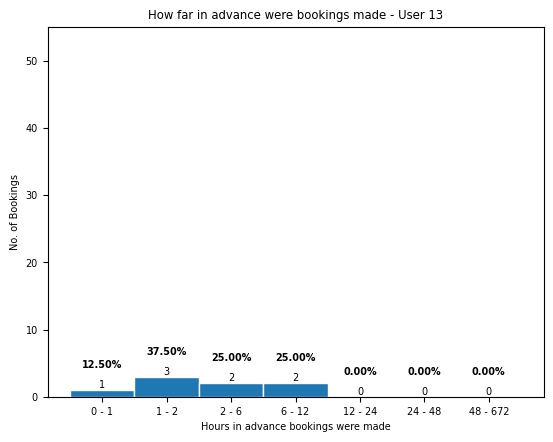

In [42]:
# Booking pattern for User 13

# How far in advance was a booking made in hours?
bookingsUser13['diff'] = (bookingsUser13['start'] - bookingsUser13['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser13['diff'],bins)

# make modified bookings histogram
modified_bookings_user_13 = bookingsUser13['diff'].where(bookingsUser13['modified_at'] > bookingsUser13['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_13, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 13")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser13)
print(total_bookings, 'bookings were made by User 13.')
print(modified_bookings_user_13.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 13 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 13
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_13_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

0 bookings were made by User 13 in the first week.


/var/folders/8_/t19tfm1d4gj320q9vpfcj_dr0000gn/T/ipykernel_25106/2220533384.py:48: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (height / total_bookings) * 100


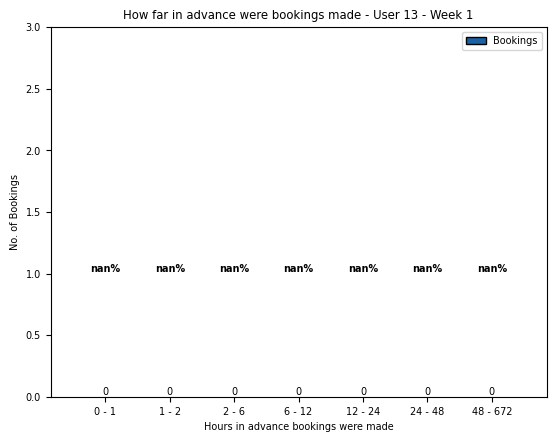

In [26]:
# Booking pattern for User 13 - Week 1

bookingsUser13Week1 = bookingsUser13[(bookingsUser13['created_at'] >= g1W1StartDate) & (bookingsUser13['created_at'] <= g1W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser13Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 13 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser13Week1)
print(total_bookings, 'bookings were made by User 13 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

8 bookings were made by User 13 in the second week.


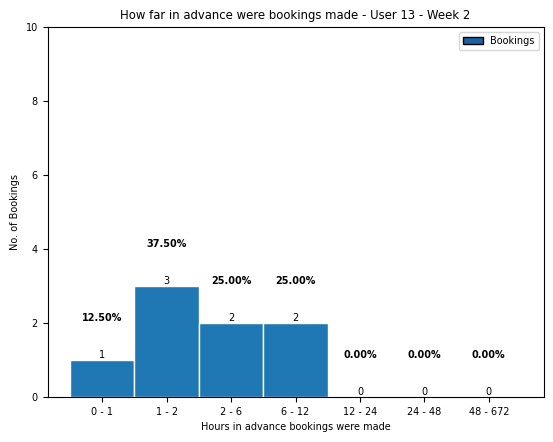

In [106]:
# Booking pattern for User 13 - Week 2

bookingsUser13Week2 = bookingsUser13[(bookingsUser13['created_at'] >= g1W2StartDate) & (bookingsUser13['created_at'] <= g1W2EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser13Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 13 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser13Week2)
print(total_bookings, 'bookings were made by User 13 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

0 bookings were made by User 13 in the third week.


/var/folders/8_/t19tfm1d4gj320q9vpfcj_dr0000gn/T/ipykernel_25106/2600852829.py:48: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (height / total_bookings) * 100


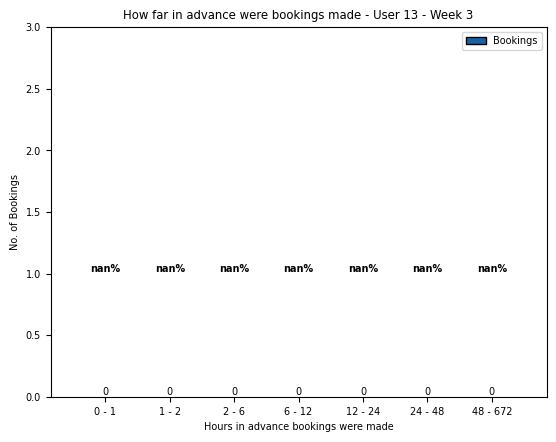

In [30]:
# Booking pattern for User 13 - Week 3

bookingsUser13Week3 = bookingsUser13[(bookingsUser13['created_at'] >= g1W3StartDate) & (bookingsUser13['created_at'] <= g1W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser13Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 13 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser13Week3)
print(total_bookings, 'bookings were made by User 13 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [75]:
# Do people book at the same times / are there overlapping bookings? 
# Or do users shy away from booking at the same time as others? 

# Group 1

g1Bookings = bookings.loc[bookings['user'].isin(group1)].copy()
# print(len(g1Bookings))

# Group by hour and count overlaps
hourly_overlap_per_day_g1 = g1Bookings.groupby([g1Bookings['start'].dt.date, g1Bookings['start'].dt.hour])['user'].nunique()

count_occurrences = hourly_overlap_per_day_g1.value_counts().sort_index()
print(count_occurrences)

with pd.option_context('display.max_rows', None):
    display(hourly_overlap_per_day_g1)

1    61
2    11
Name: user, dtype: int64


start       start
2023-04-02  8        1
2023-04-07  9        1
            12       2
2023-04-08  8        1
            10       1
            15       1
2023-04-21  8        1
            13       1
            15       1
            17       1
2023-04-22  9        2
            11       2
            14       1
            16       1
2023-04-23  13       1
            15       1
            18       1
2023-04-24  14       1
2023-04-25  8        2
            10       1
            16       2
2023-04-26  17       1
2023-04-27  11       1
            13       1
2023-04-28  13       1
            15       1
2023-04-29  9        1
            10       2
            11       2
            12       1
            16       1
            17       1
2023-04-30  9        1
            10       1
            11       1
            12       2
            13       2
            14       2
2023-05-01  9        1
            10       1
            15       1
            17       1
            19  

In [29]:
# Group 2 Analysis - Users 15,16,17,18

In [68]:
g2W1StartDate = datetime.datetime(2023,6,4,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g2W1EndDate = datetime.datetime(2023,6,11,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g2W2StartDate = datetime.datetime(2023,6,12,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g2W2EndDate = datetime.datetime(2023,6,18,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g2W3StartDate = datetime.datetime(2023,6,19,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g2W3EndDate = datetime.datetime(2023,6,29,0,0,0,0,tzinfo=pytz.timezone('UTC'))

In [12]:
# User 15

bookingsUser15 = bookings.loc[bookings['user'] == 15].copy()
bookingsUser15

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
142,2023-06-10 09:00:00+00:00,3600,washing_and_drying (30min),Totally flexible but thought I'd get in there ...,yes,0.48,14,electricity_consumption,15,2023-06-08 17:25:05+00:00,2023-06-06 05:15:53+00:00
186,2023-06-12 11:00:00+00:00,3600,washing_and_drying (30min),,yes,0.48,14,electricity_consumption,15,2023-06-12 09:06:16+00:00,2023-06-12 09:06:16+00:00
211,2023-06-16 08:30:00+00:00,3600,washing_and_drying (30min),,yes,0.48,14,electricity_consumption,15,2023-06-15 06:37:10+00:00,2023-06-15 06:37:10+00:00
233,2023-06-19 13:00:00+00:00,1800,ironing (30min),,yes,0.13,14,electricity_consumption,15,2023-06-19 11:35:36+00:00,2023-06-19 11:35:36+00:00
235,2023-06-20 11:00:00+00:00,3600,washing_and_drying (30min),,no,0.48,14,electricity_consumption,15,2023-06-20 07:29:32+00:00,2023-06-20 07:29:32+00:00
244,2023-06-21 10:00:00+00:00,1800,ironing (30min),,yes,0.13,14,electricity_consumption,15,2023-06-21 08:21:41+00:00,2023-06-21 08:21:41+00:00
251,2023-06-22 10:00:00+00:00,3600,washing_and_drying (30min),,yes,0.48,14,electricity_consumption,15,2023-06-22 07:33:42+00:00,2023-06-22 05:54:06+00:00
255,2023-06-23 09:30:00+00:00,3600,washing_and_drying (30min),,yes,0.48,14,electricity_consumption,15,2023-06-23 08:25:19+00:00,2023-06-23 08:25:19+00:00
256,2023-06-24 10:00:00+00:00,3600,washing_and_drying (30min),,yes,0.48,14,electricity_consumption,15,2023-06-24 08:34:45+00:00,2023-06-24 08:34:45+00:00
259,2023-06-26 12:00:00+00:00,3600,washing_and_drying (30min),,yes,0.48,14,electricity_consumption,15,2023-06-26 10:41:06+00:00,2023-06-26 10:41:06+00:00


10 bookings were made by User 15.
2 of those bookings were modified.


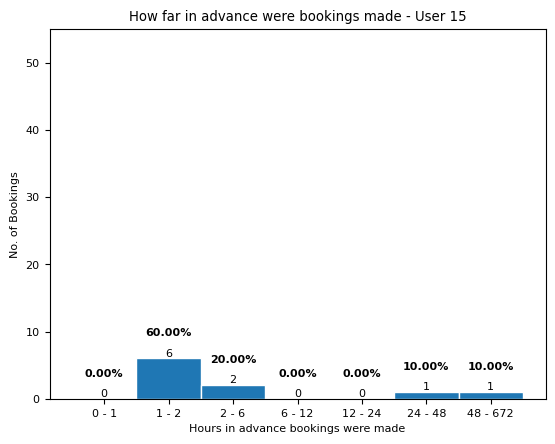

In [41]:
# Booking pattern for User 15

# How far in advance was a booking made in hours?
bookingsUser15['diff'] = (bookingsUser15['start'] - bookingsUser15['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 8})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser15['diff'],bins)

# make modified bookings histogram
modified_bookings_user_15 = bookingsUser15['diff'].where(bookingsUser15['modified_at'] > bookingsUser15['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_15, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 15")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser15)
print(total_bookings, 'bookings were made by User 15.')
print(modified_bookings_user_15.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 15 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 15
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_15_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

1 bookings were made by User 15 in the first week.


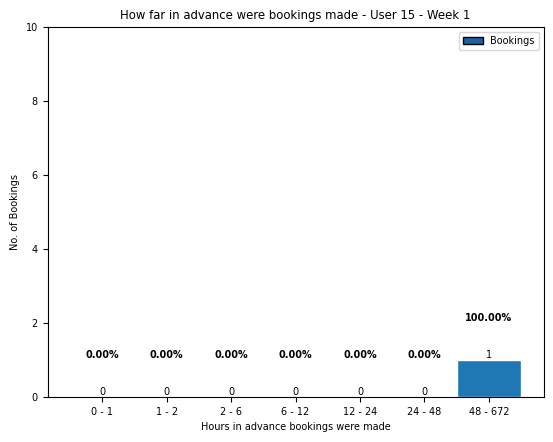

In [110]:
# Booking pattern for User 15 - Week 1

bookingsUser15Week1 = bookingsUser15[(bookingsUser15['created_at'] >= g2W1StartDate) & (bookingsUser15['created_at'] <= g2W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser15Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 15 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser15Week1)
print(total_bookings, 'bookings were made by User 15 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

2 bookings were made by User 15 in the second week.


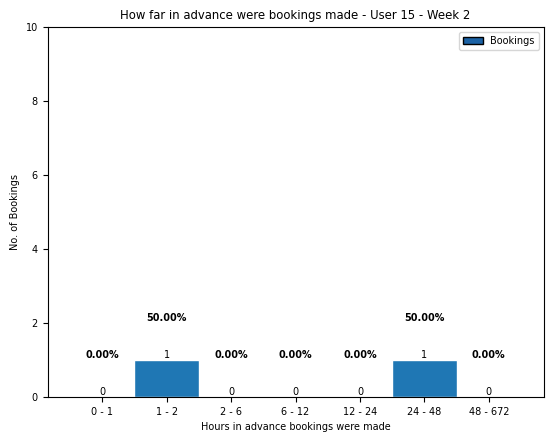

In [113]:
# Booking pattern for User 15 - Week 2

bookingsUser15Week2 = bookingsUser15[(bookingsUser15['created_at'] > g2W1EndDate) & (bookingsUser15['created_at'] < g2W3StartDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser15Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 15 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser15Week2)
print(total_bookings, 'bookings were made by User 15 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

7 bookings were made by User 15 in the third week.


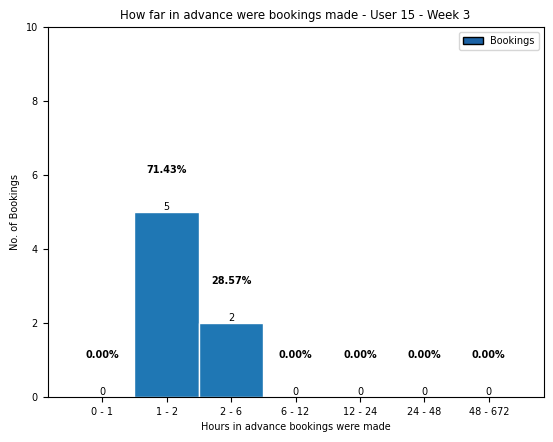

In [114]:
# Booking pattern for User 15 - Week 3

bookingsUser15Week3 = bookingsUser15[(bookingsUser15['created_at'] >= g2W3StartDate) & (bookingsUser15['created_at'] <= g2W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser15Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 15 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser15Week3)
print(total_bookings, 'bookings were made by User 15 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [14]:
# User 16

bookingsUser16 = bookings.loc[bookings['user'] == 16].copy()
with pd.option_context('display.max_rows', None):
    display(bookingsUser16)

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
143,2023-06-06 10:00:00+00:00,1800,washing_and_drying (30min),,no,0.67,8,electricity_consumption,16,2023-06-06 08:51:46+00:00,2023-06-06 08:51:46+00:00
146,2023-06-06 12:40:00+00:00,1800,kettle (30min),,no,0.12,8,electricity_consumption,16,2023-06-06 11:36:31+00:00,2023-06-06 11:36:31+00:00
149,2023-06-07 06:00:00+00:00,7200,dishwasher (120min),,no,0.94,8,electricity_consumption,16,2023-06-06 21:19:47+00:00,2023-06-06 21:19:47+00:00
150,2023-06-07 09:30:00+00:00,1800,washing_and_drying (30min),,yes,0.11,8,electricity_consumption,16,2023-06-07 08:24:21+00:00,2023-06-07 08:24:21+00:00
155,2023-06-08 07:30:00+00:00,1800,kettle (30min),,yes,0.22,8,electricity_consumption,16,2023-06-07 21:02:00+00:00,2023-06-07 21:02:00+00:00
156,2023-06-08 06:10:00+00:00,7200,dishwasher (120min),,yes,1.05,8,electricity_consumption,16,2023-06-07 21:05:26+00:00,2023-06-07 20:03:18+00:00
157,2023-06-08 12:00:00+00:00,3600,housework (60min),,yes,0.44,8,electricity_consumption,16,2023-06-08 08:17:05+00:00,2023-06-08 08:17:05+00:00
163,2023-06-08 15:20:00+00:00,3600,washing_and_drying (30min),,yes,0.67,8,electricity_consumption,16,2023-06-08 14:15:18+00:00,2023-06-08 14:15:18+00:00
164,2023-06-08 15:55:00+00:00,1800,kettle (30min),,yes,0.22,8,electricity_consumption,16,2023-06-08 14:51:08+00:00,2023-06-08 14:51:08+00:00
166,2023-06-09 08:00:00+00:00,7200,dishwasher (120min),,yes,0.94,8,electricity_consumption,16,2023-06-08 20:24:50+00:00,2023-06-08 20:24:50+00:00


61 bookings were made by User 16.
4 of those bookings were modified.


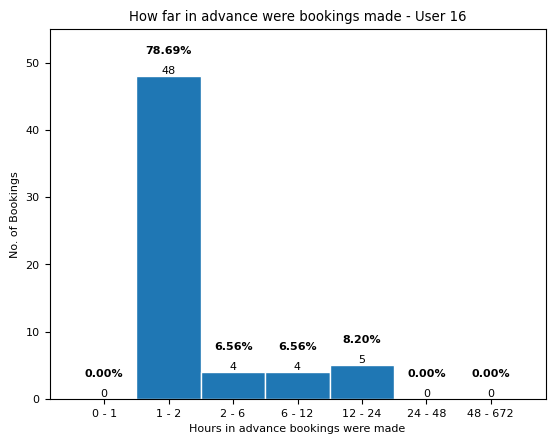

In [40]:
# Booking pattern for User 16

# How far in advance was a booking made in hours?
bookingsUser16['diff'] = (bookingsUser16['start'] - bookingsUser16['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 8})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser16['diff'],bins)

# make modified bookings histogram
modified_bookings_user_16 = bookingsUser16['diff'].where(bookingsUser16['modified_at'] > bookingsUser16['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_16, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 16")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser16)
print(total_bookings, 'bookings were made by User 16.')
print(modified_bookings_user_16.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 16 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 16
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_16_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

22 bookings were made by User 16 in the first week.


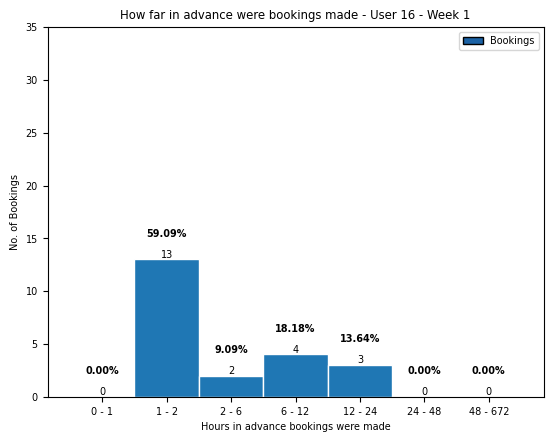

In [117]:
# Booking pattern for User 16 - Week 1

bookingsUser16Week1 = bookingsUser16[(bookingsUser16['created_at'] >= g2W1StartDate) & (bookingsUser16['created_at'] < g2W2StartDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser16Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 16 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser16Week1)
print(total_bookings, 'bookings were made by User 16 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 35  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

34 bookings were made by User 16 in the second week.


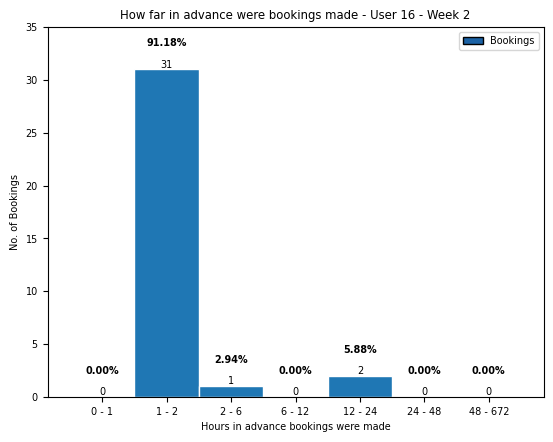

In [118]:
# Booking pattern for User 16 - Week 2

bookingsUser16Week2 = bookingsUser16[(bookingsUser16['created_at'] >= g2W2StartDate) & (bookingsUser16['created_at'] < g2W3StartDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser16Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 16 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser16Week2)
print(total_bookings, 'bookings were made by User 16 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 35  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

5 bookings were made by User 16 in the third week.


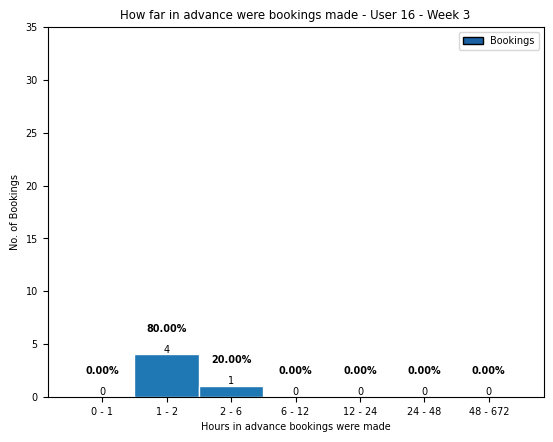

In [120]:
# Booking pattern for User 16 - Week 3

bookingsUser16Week3 = bookingsUser16[(bookingsUser16['created_at'] >= g2W3StartDate) & (bookingsUser16['created_at'] <= g2W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser16Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 16 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser16Week3)
print(total_bookings, 'bookings were made by User 16 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 35  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [16]:
# User 17

bookingsUser17 = bookings.loc[bookings['user'] == 17].copy()
bookingsUser17

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
140,2023-06-05 19:00:00+00:00,1800,hob (30min),"I wanted to put the oven on for dinner, but t...",yes,0.06,11,electricity_consumption,17,2023-06-05 17:33:43+00:00,2023-06-05 09:28:51+00:00
141,2023-06-05 20:00:00+00:00,1800,watching_tv (30min),noted : I think that might use all the solar i...,yes,0.20,11,electricity_consumption,17,2023-06-05 17:36:20+00:00,2023-06-05 16:35:05+00:00
144,2023-06-06 10:20:00+00:00,1800,oven (30min),,no,0.53,11,electricity_consumption,17,2023-06-06 09:17:56+00:00,2023-06-06 09:17:56+00:00
145,2023-06-06 11:00:00+00:00,1800,showering_and_hair-drying (30min),,yes,0.60,11,electricity_consumption,17,2023-06-06 09:18:52+00:00,2023-06-06 09:18:52+00:00
147,2023-06-06 19:30:00+00:00,1800,hob (30min),,yes,0.06,11,electricity_consumption,17,2023-06-06 17:55:53+00:00,2023-06-06 17:55:53+00:00
148,2023-06-06 21:00:00+00:00,1800,watching_tv (30min),,yes,0.20,11,electricity_consumption,17,2023-06-06 18:41:03+00:00,2023-06-06 18:41:03+00:00
151,2023-06-07 11:35:00+00:00,1800,hob (30min),,yes,0.06,11,electricity_consumption,17,2023-06-07 10:33:14+00:00,2023-06-07 10:33:14+00:00
152,2023-06-07 11:40:00+00:00,1800,hob (30min),,no,0.06,11,electricity_consumption,17,2023-06-07 10:33:40+00:00,2023-06-07 10:33:40+00:00
153,2023-06-07 13:00:00+00:00,3600,computer (60min),,somewhat,0.16,11,electricity_consumption,17,2023-06-07 10:34:14+00:00,2023-06-07 10:34:14+00:00
154,2023-06-07 15:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-07 10:34:33+00:00,2023-06-07 10:34:33+00:00


40 bookings were made by User 17.
11 of those bookings were modified.


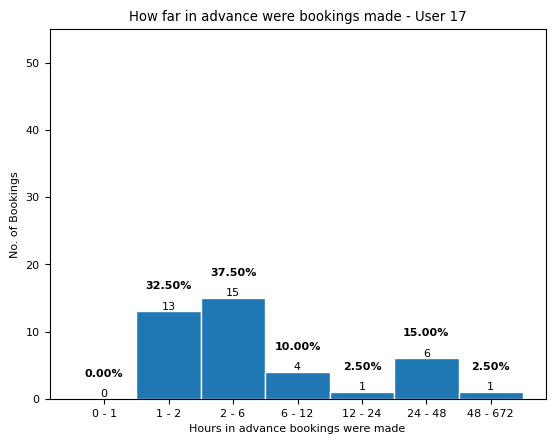

In [39]:
# Booking pattern for User 17

# How far in advance was a booking made in hours?
bookingsUser17['diff'] = (bookingsUser17['start'] - bookingsUser17['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 8})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser17['diff'],bins)

# make modified bookings histogram
modified_bookings_user_17 = bookingsUser17['diff'].where(bookingsUser17['modified_at'] > bookingsUser17['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_17, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 17")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser17)
print(total_bookings, 'bookings were made by User 17.')
print(modified_bookings_user_17.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 17 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 17
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_17_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

18 bookings were made by User 17 in the first week.


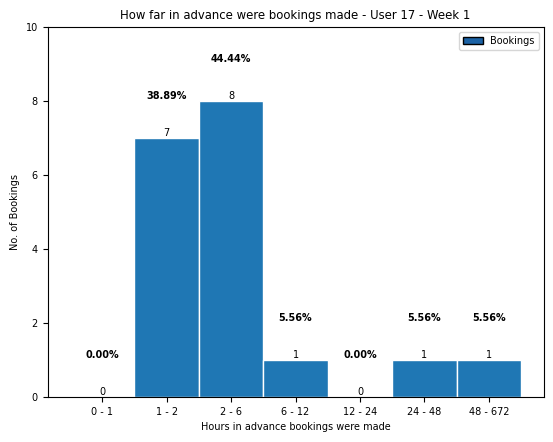

In [123]:
# Booking pattern for User 17 - Week 1

bookingsUser17Week1 = bookingsUser17[(bookingsUser17['created_at'] >= g2W1StartDate) & (bookingsUser17['created_at'] < g2W2StartDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser17Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 17 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser17Week1)
print(total_bookings, 'bookings were made by User 17 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
199,2023-06-14 10:50:00+00:00,1800,oven (30min),,no,0.23,11,electricity_consumption,17,2023-06-14 09:45:30+00:00,2023-06-14 09:45:30+00:00,1.075000
200,2023-06-14 11:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-14 09:45:49+00:00,2023-06-14 09:45:49+00:00,1.236389
201,2023-06-14 18:00:00+00:00,1800,hob (30min),,somewhat,0.06,11,electricity_consumption,17,2023-06-14 09:46:18+00:00,2023-06-14 09:46:18+00:00,8.228333
202,2023-06-14 16:00:00+00:00,3600,computer (60min),,somewhat,0.16,11,electricity_consumption,17,2023-06-14 09:47:16+00:00,2023-06-14 07:46:46+00:00,8.220556
203,2023-06-14 17:00:00+00:00,3600,computer (60min),,somewhat,0.16,11,electricity_consumption,17,2023-06-14 09:47:41+00:00,2023-06-14 09:47:41+00:00,7.205278
204,2023-06-15 11:00:00+00:00,3600,computer (60min),,somewhat,0.16,11,electricity_consumption,17,2023-06-14 10:01:16+00:00,2023-06-14 10:01:16+00:00,24.978889
205,2023-06-15 12:00:00+00:00,3600,computer (60min),,somewhat,0.16,11,electricity_consumption,17,2023-06-14 10:01:52+00:00,2023-06-14 09:01:36+00:00,26.973333
206,2023-06-15 10:30:00+00:00,1800,hob (30min),,yes,0.06,11,electricity_consumption,17,2023-06-14 10:03:03+00:00,2023-06-14 10:03:03+00:00,24.449167


8 bookings were made by User 17 in the second week.


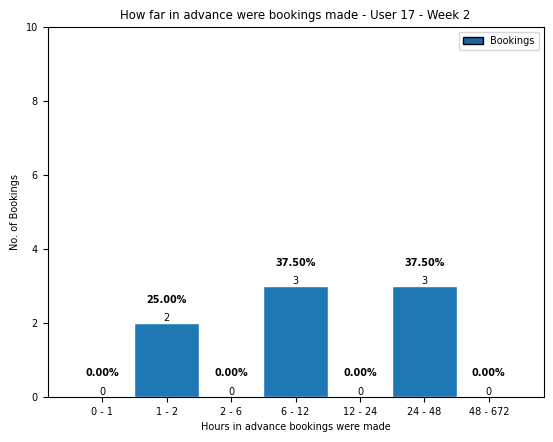

In [125]:
# Booking pattern for User 17 - Week 2

bookingsUser17Week2 = bookingsUser17[(bookingsUser17['created_at'] >= g2W2StartDate) & (bookingsUser17['created_at'] <= g2W2EndDate)]
display(bookingsUser17Week2)
plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser17Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 17 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser17Week2)
print(total_bookings, 'bookings were made by User 17 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
236,2023-06-20 13:00:00+00:00,7200,washing_and_drying (120min),,somewhat,0.86,11,electricity_consumption,17,2023-06-20 08:46:34+00:00,2023-06-20 08:46:34+00:00,4.223889
237,2023-06-21 11:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-20 08:53:20+00:00,2023-06-20 07:52:13+00:00,27.129722
238,2023-06-21 14:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-20 08:54:11+00:00,2023-06-20 08:54:11+00:00,29.096944
253,2023-06-22 11:00:00+00:00,1800,washing_and_drying (30min),,yes,0.56,11,electricity_consumption,17,2023-06-22 08:39:06+00:00,2023-06-22 07:38:41+00:00,3.355278
254,2023-06-22 12:00:00+00:00,1800,washing_and_drying (30min),,somewhat,0.43,11,electricity_consumption,17,2023-06-22 08:39:47+00:00,2023-06-22 08:39:47+00:00,3.336944
260,2023-06-26 12:00:00+00:00,5400,washing_and_drying (90min),,yes,0.58,11,electricity_consumption,17,2023-06-26 10:42:34+00:00,2023-06-26 10:42:34+00:00,1.290556
261,2023-06-26 12:00:00+00:00,5400,washing_and_drying (90min),,yes,0.58,11,electricity_consumption,17,2023-06-26 10:42:35+00:00,2023-06-26 10:42:35+00:00,1.290278
262,2023-06-26 17:00:00+00:00,1800,washing_and_drying (30min),,somewhat,0.43,11,electricity_consumption,17,2023-06-26 15:52:54+00:00,2023-06-26 15:52:54+00:00,1.118333
263,2023-06-27 12:00:00+00:00,1800,hob (30min),,yes,0.06,11,electricity_consumption,17,2023-06-26 19:59:25+00:00,2023-06-26 19:59:25+00:00,16.009722
283,2023-06-27 14:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-27 12:05:06+00:00,2023-06-27 12:05:06+00:00,1.915000


14 bookings were made by User 17 in the third week.


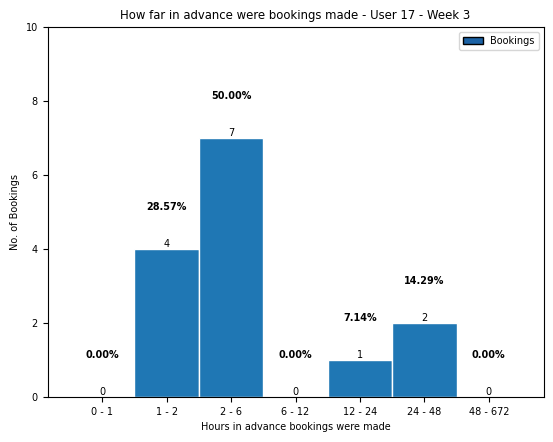

In [69]:
# Booking pattern for User 17 - Week 3

bookingsUser17Week3 = bookingsUser17[(bookingsUser17['created_at'] > g2W2EndDate) & (bookingsUser17['created_at'] <= g2W3EndDate)]
display(bookingsUser17Week3)

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser17Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 17 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser17Week3)
print(total_bookings, 'bookings were made by User 17 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [18]:
# User 18

bookingsUser18 = bookings.loc[bookings['user'] == 18].copy()
bookingsUser18

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
165,2023-06-09 06:00:00+00:00,7200,washing_and_drying (120min),Washing machine,yes,0.43,12,electricity_consumption,18,2023-06-08 18:46:14+00:00,2023-06-08 16:14:44+00:00
173,2023-06-10 08:00:00+00:00,7200,washing_and_drying (120min),,yes,0.43,12,electricity_consumption,18,2023-06-10 06:50:53+00:00,2023-06-10 06:50:53+00:00
176,2023-06-11 07:00:00+00:00,9000,dishwasher (150min),,no,0.92,12,electricity_consumption,18,2023-06-10 17:57:17+00:00,2023-06-10 17:57:17+00:00
220,2023-06-17 14:30:00+00:00,7200,washing_and_drying (120min),,yes,0.42,12,electricity_consumption,18,2023-06-17 13:24:27+00:00,2023-06-17 13:24:27+00:00


4 bookings were made by User 18.
1 of those bookings were modified.


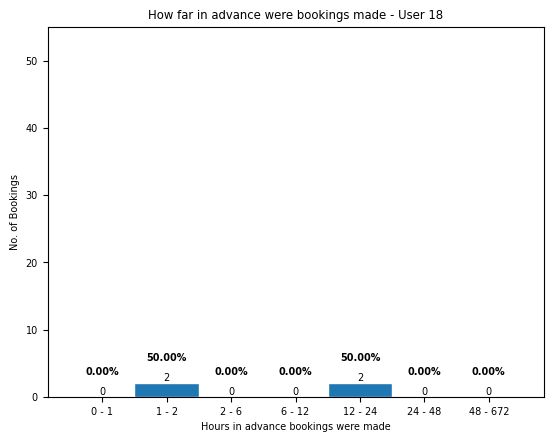

In [38]:
# Booking pattern for User 18

# How far in advance was a booking made in hours?
bookingsUser18['diff'] = (bookingsUser18['start'] - bookingsUser18['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser18['diff'],bins)

# make modified bookings histogram
modified_bookings_user_18 = bookingsUser18['diff'].where(bookingsUser18['modified_at'] > bookingsUser18['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_18, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 18")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser18)
print(total_bookings, 'bookings were made by User 18.')
print(modified_bookings_user_18.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 18 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 18
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_18_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

3 bookings were made by User 18 in the first week.


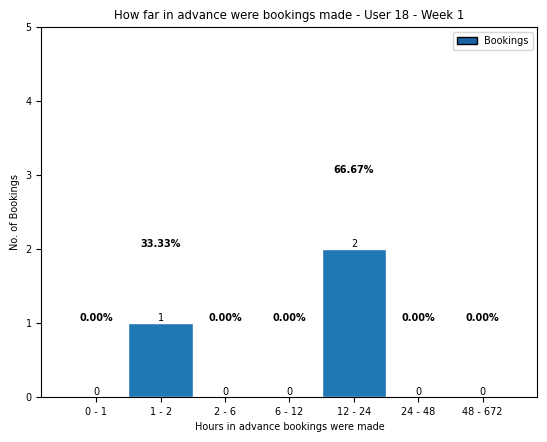

In [129]:
# Booking pattern for User 18 - Week 1

bookingsUser18Week1 = bookingsUser18[(bookingsUser18['created_at'] >= g2W1StartDate) & (bookingsUser18['created_at'] <= g2W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser18Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 18 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser18Week1)
print(total_bookings, 'bookings were made by User 18 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 5  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

1 bookings were made by User 18 in the second week.


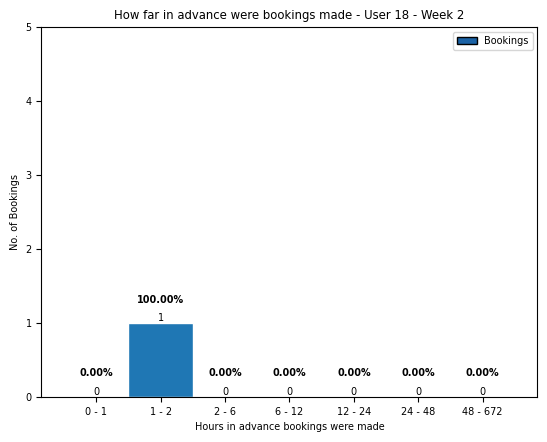

In [130]:
# Booking pattern for User 18 - Week 2

bookingsUser18Week2 = bookingsUser18[(bookingsUser18['created_at'] > g2W1EndDate) & (bookingsUser18['created_at'] < g2W3StartDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser18Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 18 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser18Week2)
print(total_bookings, 'bookings were made by User 18 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.25, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 5  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()


0 bookings were made by User 18 in the third week.


/var/folders/8_/t19tfm1d4gj320q9vpfcj_dr0000gn/T/ipykernel_25106/1978614803.py:48: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (height / total_bookings) * 100


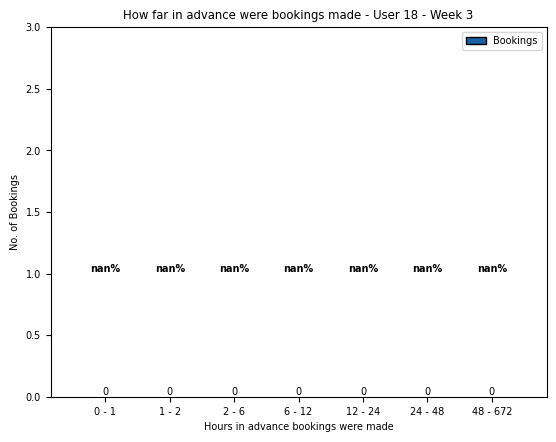

In [53]:
# Booking pattern for User 18 - Week 3

bookingsUser18Week3 = bookingsUser18[(bookingsUser18['created_at'] >= g2W3StartDate) & (bookingsUser18['created_at'] <= g2W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser18Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 18 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser18Week3)
print(total_bookings, 'bookings were made by User 18 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [76]:
# Do people book at the same times / are there overlapping bookings? 
# Or do users shy away from booking at the same time as others? 

# Group 2

g2Bookings = bookings.loc[bookings['user'].isin(group2)].copy()
# print(len(g2Bookings))

# Group by hour and count overlaps
hourly_overlap_per_day_g2 = g2Bookings.groupby([g2Bookings['start'].dt.date, g2Bookings['start'].dt.hour])['user'].nunique()

count_occurrences = hourly_overlap_per_day_g2.value_counts().sort_index()
print(count_occurrences)

with pd.option_context('display.max_rows', None):
    display(hourly_overlap_per_day_g2)

1    88
2     8
Name: user, dtype: int64


start       start
2023-06-05  19       1
            20       1
2023-06-06  10       2
            11       1
            12       1
            19       1
            21       1
2023-06-07  6        1
            9        1
            11       1
            13       1
            15       1
2023-06-08  6        1
            7        1
            11       1
            12       2
            14       1
            15       2
2023-06-09  6        1
            8        1
            10       2
            11       1
            14       1
            18       1
2023-06-10  7        1
            8        1
            9        1
            10       1
2023-06-11  7        1
            9        1
            10       1
            11       1
            12       1
            15       1
            18       1
2023-06-12  7        1
            10       1
            11       2
            15       1
            18       1
2023-06-13  6        1
            7        1
            8   

In [46]:
#Group 3 Analysis - Users 19,20,21

In [132]:
g3W1StartDate = datetime.datetime(2023,6,19,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g3W1EndDate = datetime.datetime(2023,6,25,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g3W2StartDate = datetime.datetime(2023,6,26,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g3W2EndDate = datetime.datetime(2023,7,2,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g3W3StartDate = datetime.datetime(2023,7,3,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g3W3EndDate = datetime.datetime(2023,7,9,0,0,0,0,tzinfo=pytz.timezone('UTC'))

In [20]:
# User 19

bookingsUser19 = bookings.loc[bookings['user'] == 19].copy()
bookingsUser19

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
245,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:41:28+00:00,2023-06-21 14:41:28+00:00
246,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:41:47+00:00,2023-06-21 14:41:47+00:00
247,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:42:13+00:00,2023-06-21 14:42:13+00:00
248,2023-06-22 16:30:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:44:05+00:00,2023-06-21 14:44:05+00:00
252,2023-06-22 10:00:00+00:00,5400,dishwasher (30min),I'd like to do this while Im out - leaving at...,somewhat,0.05,15,electricity_consumption,19,2023-06-22 08:36:35+00:00,2023-06-22 08:36:35+00:00
276,2023-06-27 14:00:00+00:00,5400,washing_and_drying (30min),,yes,0.04,15,electricity_consumption,19,2023-06-27 08:06:36+00:00,2023-06-27 08:06:36+00:00
277,2023-06-28 00:00:00+00:00,5400,washing_and_drying (30min),,yes,0.04,15,electricity_consumption,19,2023-06-27 08:08:46+00:00,2023-06-27 08:08:46+00:00
278,2023-06-27 10:00:00+00:00,5400,washing_and_drying (30min),I can change this is needed to later,somewhat,0.04,15,electricity_consumption,19,2023-06-27 08:11:16+00:00,2023-06-27 08:11:16+00:00
279,2023-06-28 00:00:00+00:00,5400,washing_and_drying (30min),I can change this if needed to later,yes,0.04,15,electricity_consumption,19,2023-06-27 08:12:00+00:00,2023-06-27 08:12:00+00:00
280,2023-06-28 14:00:00+00:00,5400,washing_and_drying (30min),I can change this if needed to later,yes,0.04,15,electricity_consumption,19,2023-06-27 08:12:39+00:00,2023-06-27 08:12:39+00:00


12 bookings were made by User 19.
0 of those bookings were modified.


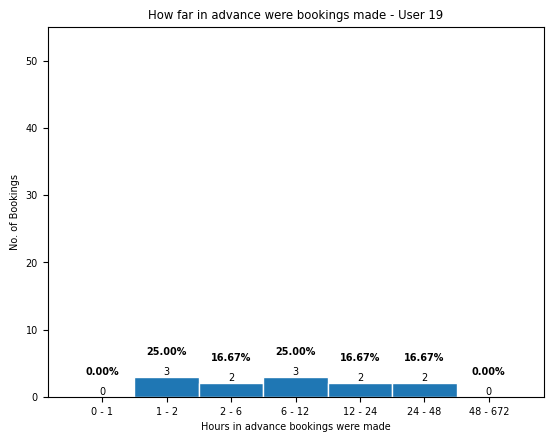

In [37]:
# Booking pattern for User 19

# How far in advance was a booking made in hours?
bookingsUser19['diff'] = (bookingsUser19['start'] - bookingsUser19['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser19['diff'],bins)

# make modified bookings histogram
modified_bookings_user_19 = bookingsUser19['diff'].where(bookingsUser19['modified_at'] > bookingsUser19['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_19, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 19")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser19)
print(total_bookings, 'bookings were made by User 19.')
print(modified_bookings_user_19.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 19 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 18
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_19_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

5 bookings were made by User 19 in the first week.


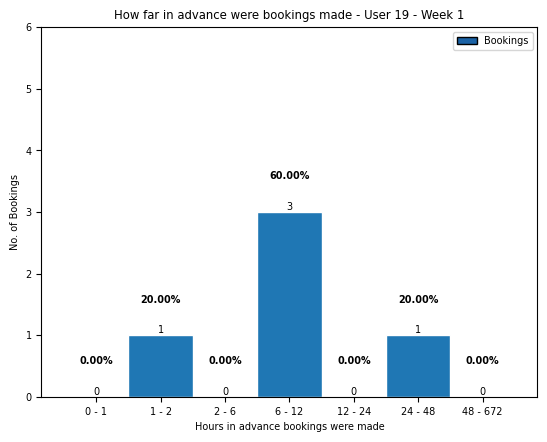

In [137]:
# Booking pattern for User 19 - Week 1

bookingsUser19Week1 = bookingsUser19[(bookingsUser19['created_at'] >= g3W1StartDate) & (bookingsUser19['created_at'] <= g3W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser19Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 19 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser19Week1)
print(total_bookings, 'bookings were made by User 19 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 6  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

6 bookings were made by User 19 in the second week.


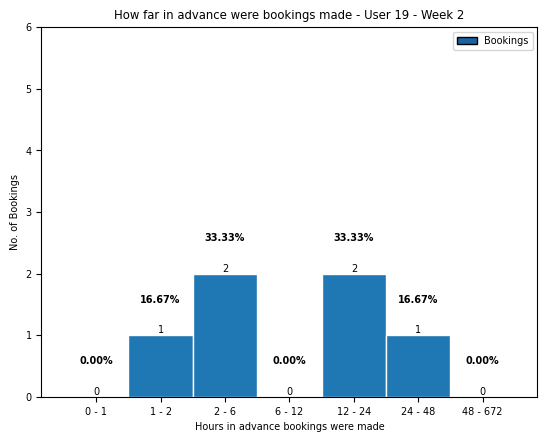

In [138]:
# Booking pattern for User 19 - Week 2

bookingsUser19Week2 = bookingsUser19[(bookingsUser19['created_at'] >= g3W2StartDate) & (bookingsUser19['created_at'] <= g3W2EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser19Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 19 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser19Week2)
print(total_bookings, 'bookings were made by User 19 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 6  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

1 bookings were made by User 19 in the third week.


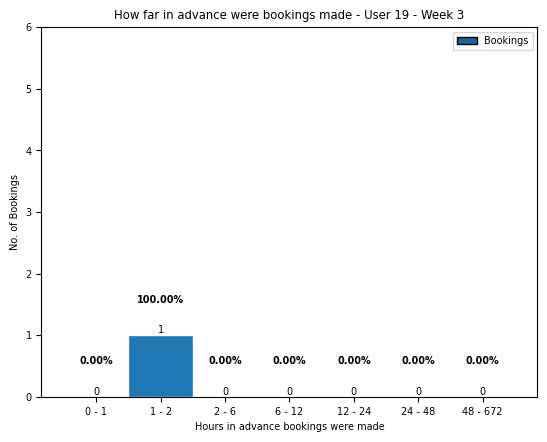

In [139]:
# Booking pattern for User 19 - Week 3

bookingsUser19Week3 = bookingsUser19[(bookingsUser19['created_at'] >= g3W3StartDate) & (bookingsUser19['created_at'] <= g3W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser19Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 19 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser19Week3)
print(total_bookings, 'bookings were made by User 19 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 6  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [22]:
# User 20

bookingsUser20 = bookings.loc[bookings['user'] == 20].copy()
bookingsUser20

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
240,2023-06-20 15:15:00+00:00,1800,watching_tv (30min),I can watch the TV Later in the day but my fav...,somewhat,0.05,16,electricity_consumption,20,2023-06-20 14:13:57+00:00,2023-06-20 14:13:57+00:00
242,2023-06-20 18:00:00+00:00,1800,other (30min),Using HOB for dinner.,no,0.05,16,electricity_consumption,20,2023-06-20 16:50:42+00:00,2023-06-20 16:50:42+00:00
257,2023-06-24 15:52:00+00:00,3600,other (30min),Ps4 being used with TV,somewhat,0.05,16,electricity_consumption,20,2023-06-24 14:51:12+00:00,2023-06-24 14:51:12+00:00
258,2023-06-25 11:00:00+00:00,5400,washing_and_drying (30min),,no,0.14,16,electricity_consumption,20,2023-06-25 09:57:09+00:00,2023-06-25 09:57:09+00:00
281,2023-07-01 11:00:00+00:00,10800,other (180min),Having some people round,yes,1.20,16,electricity_consumption,20,2023-06-27 09:21:57+00:00,2023-06-27 07:19:55+00:00
282,2023-06-30 16:00:00+00:00,1800,lighting (30min),,yes,0.06,16,electricity_consumption,20,2023-06-27 09:35:32+00:00,2023-06-27 09:35:32+00:00
288,2023-06-28 17:00:00+00:00,7200,watching_tv (120min),Watching TV,somewhat,0.37,16,electricity_consumption,20,2023-06-28 15:44:43+00:00,2023-06-28 15:44:43+00:00
292,2023-06-29 20:00:00+00:00,1800,other (30min),Dinner,no,0.05,16,electricity_consumption,20,2023-06-29 18:15:44+00:00,2023-06-29 18:15:44+00:00
293,2023-06-29 20:00:00+00:00,1800,other (30min),Dinner,no,0.05,16,electricity_consumption,20,2023-06-29 18:15:49+00:00,2023-06-29 18:15:49+00:00
295,2023-07-03 11:00:00+00:00,5400,washing_and_drying (60min),Doing Laundry,somewhat,0.47,16,electricity_consumption,20,2023-07-02 18:58:21+00:00,2023-07-02 18:58:21+00:00


11 bookings were made by User 20.
1 of those bookings were modified.


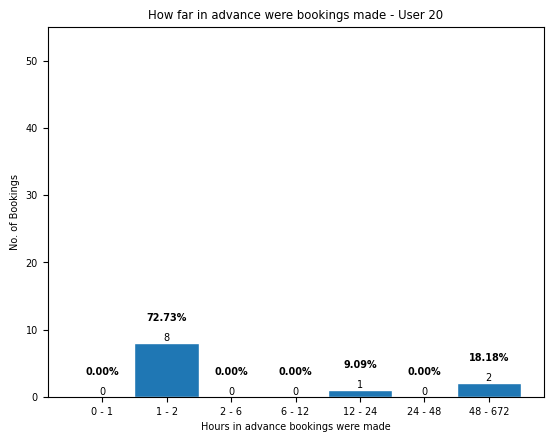

In [36]:
# Booking pattern for User 20

# How far in advance was a booking made in hours?
bookingsUser20['diff'] = (bookingsUser20['start'] - bookingsUser20['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser20['diff'],bins)

# make modified bookings histogram
modified_bookings_user_20 = bookingsUser20['diff'].where(bookingsUser20['modified_at'] > bookingsUser20['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_20, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 20")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser20)
print(total_bookings, 'bookings were made by User 20.')
print(modified_bookings_user_20.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 20 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 18
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_20_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

4 bookings were made by User 20 in the first week.


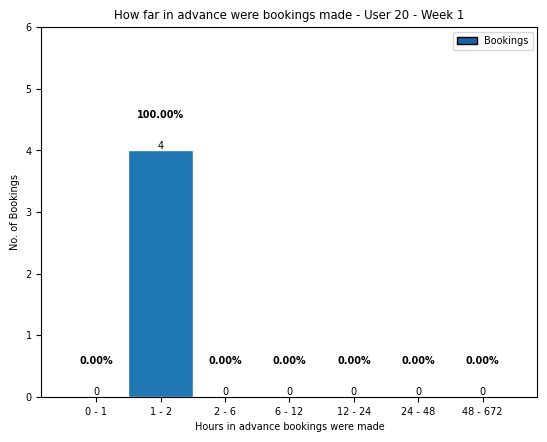

In [144]:
# Booking pattern for User 20 - Week 1

bookingsUser20Week1 = bookingsUser20[(bookingsUser20['created_at'] >= g3W1StartDate) & (bookingsUser20['created_at'] < g3W2StartDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser20Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 20 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser20Week1)
print(total_bookings, 'bookings were made by User 20 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 6  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

6 bookings were made by User 20 in the second week.


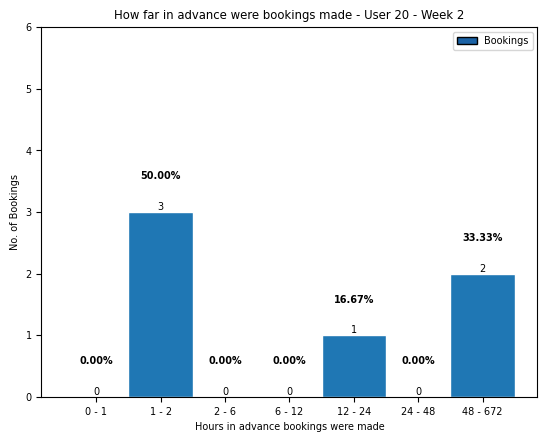

In [145]:

# Booking pattern for User 20 - Week 2

bookingsUser20Week2 = bookingsUser20[(bookingsUser20['created_at'] >= g3W2StartDate) & (bookingsUser20['created_at'] < g3W3StartDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser20Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 20 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser20Week2)
print(total_bookings, 'bookings were made by User 20 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 6  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

1 bookings were made by User 20 in the third week.


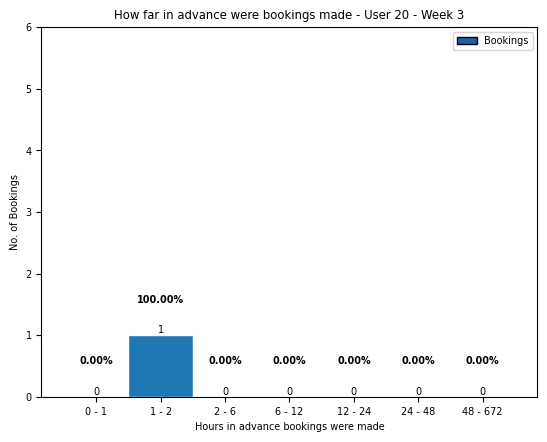

In [146]:
# Booking pattern for User 20 - Week 3

bookingsUser20Week3 = bookingsUser20[(bookingsUser20['created_at'] >= g3W3StartDate) & (bookingsUser20['created_at'] <= g3W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser20Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 20 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser20Week3)
print(total_bookings, 'bookings were made by User 20 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 6  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [24]:
# User 21

bookingsUser21 = bookings.loc[bookings['user'] == 21].copy()
bookingsUser21

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
249,2023-06-21 22:00:00+00:00,5400,dishwasher (90min),,yes,0.86,5,electricity_consumption,21,2023-06-21 17:08:30+00:00,2023-06-21 17:08:30+00:00
250,2023-06-21 19:00:00+00:00,1800,hob (30min),,yes,0.52,5,electricity_consumption,21,2023-06-21 17:09:31+00:00,2023-06-21 17:09:31+00:00
264,2023-06-27 18:00:00+00:00,1800,oven (30min),Supper,yes,0.52,5,electricity_consumption,21,2023-06-27 05:09:35+00:00,2023-06-27 05:09:35+00:00
265,2023-06-27 19:00:00+00:00,1800,hob (30min),Supper,yes,0.36,5,electricity_consumption,21,2023-06-27 05:09:50+00:00,2023-06-27 05:09:50+00:00
266,2023-06-27 22:00:00+00:00,3600,dishwasher (60min),,yes,0.64,5,electricity_consumption,21,2023-06-27 05:10:10+00:00,2023-06-27 05:10:10+00:00
267,2023-06-28 18:00:00+00:00,1800,hob (30min),Supper,yes,0.36,5,electricity_consumption,21,2023-06-27 05:10:28+00:00,2023-06-27 05:10:28+00:00
268,2023-06-28 19:00:00+00:00,1800,oven (30min),Supper,yes,0.52,5,electricity_consumption,21,2023-06-27 05:10:41+00:00,2023-06-27 05:10:41+00:00
269,2023-06-28 22:00:00+00:00,3600,dishwasher (60min),,yes,0.51,5,electricity_consumption,21,2023-06-27 05:10:51+00:00,2023-06-27 05:10:51+00:00
270,2023-06-29 18:00:00+00:00,3600,hob (60min),Supper,yes,0.73,5,electricity_consumption,21,2023-06-27 05:11:11+00:00,2023-06-27 05:11:11+00:00
271,2023-06-30 18:00:00+00:00,3600,hob (60min),Supper,yes,0.73,5,electricity_consumption,21,2023-06-27 05:11:46+00:00,2023-06-27 05:11:46+00:00


17 bookings were made by User 21.
1 of those bookings were modified.


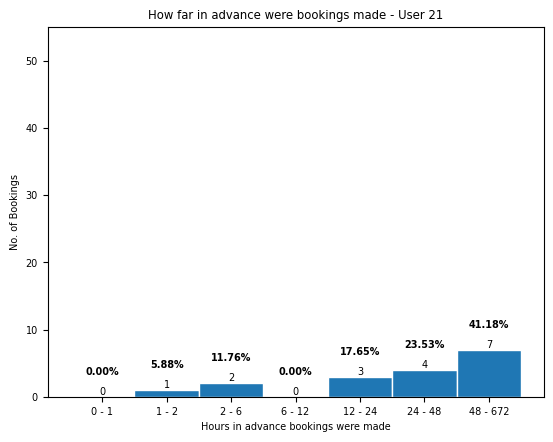

In [35]:
# Booking pattern for User 21

# How far in advance was a booking made in hours?
bookingsUser21['diff'] = (bookingsUser21['start'] - bookingsUser21['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser21['diff'],bins)

# make modified bookings histogram
modified_bookings_user_21 = bookingsUser21['diff'].where(bookingsUser21['modified_at'] > bookingsUser21['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_21, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 21")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser21)
print(total_bookings, 'bookings were made by User 21.')
print(modified_bookings_user_21.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 21 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 21
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_21_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

2 bookings were made by User 21 in the first week.


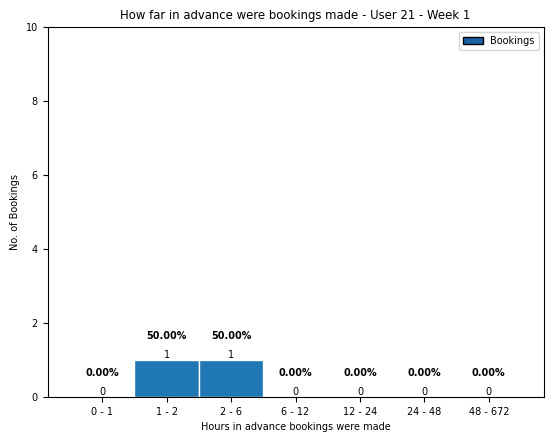

In [155]:
# Booking pattern for User 21 - Week 1

bookingsUser21Week1 = bookingsUser21[(bookingsUser21['created_at'] >= g3W1StartDate) & (bookingsUser21['created_at'] <= g3W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser21Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 21 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser21Week1)
print(total_bookings, 'bookings were made by User 21 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

15 bookings were made by User 21 in the second week.


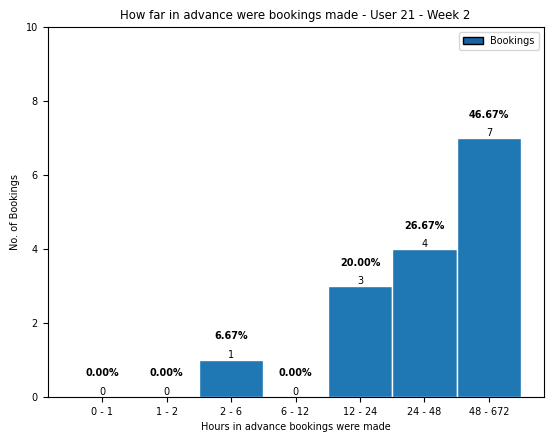

In [154]:
# Booking pattern for User 21 - Week 2

bookingsUser21Week2 = bookingsUser21[(bookingsUser21['created_at'] >= g3W2StartDate) & (bookingsUser21['created_at'] <= g3W2EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser21Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 21 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser21Week2)
print(total_bookings, 'bookings were made by User 21 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

0 bookings were made by User 21 in the third week.


/var/folders/8_/t19tfm1d4gj320q9vpfcj_dr0000gn/T/ipykernel_25106/2097167137.py:48: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (height / total_bookings) * 100


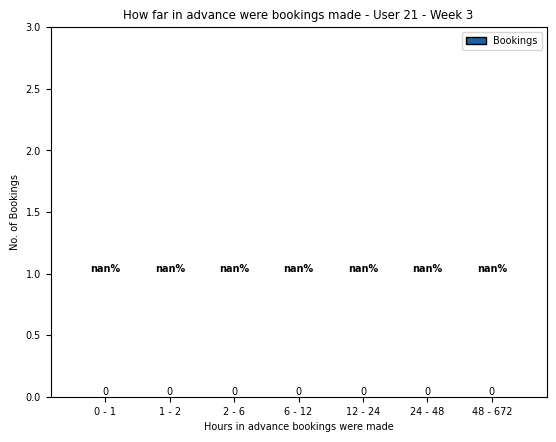

In [71]:
# Booking pattern for User 21 - Week 3

bookingsUser21Week3 = bookingsUser21[(bookingsUser21['created_at'] >= g3W3StartDate) & (bookingsUser21['created_at'] <= g3W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser21Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 21 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser21Week3)
print(total_bookings, 'bookings were made by User 21 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [77]:
# Do people book at the same times / are there overlapping bookings? 
# Or do users shy away from booking at the same time as others? 

# Group 3

g3Bookings = bookings.loc[bookings['user'].isin(group3)].copy()
# print(len(g3Bookings))

# Group by hour and count overlaps
hourly_overlap_per_day_g3 = g3Bookings.groupby([g3Bookings['start'].dt.date, g3Bookings['start'].dt.hour])['user'].nunique()

count_occurrences = hourly_overlap_per_day_g3.value_counts().sort_index()
print(count_occurrences)

with pd.option_context('display.max_rows', None):
    display(hourly_overlap_per_day_g3)

1    36
Name: user, dtype: int64


start       start
2023-06-20  15       1
            18       1
2023-06-21  19       1
            22       1
2023-06-22  0        1
            10       1
            16       1
2023-06-24  15       1
2023-06-25  11       1
2023-06-27  10       1
            14       1
            18       1
            19       1
            22       1
2023-06-28  0        1
            14       1
            17       1
            18       1
            19       1
            22       1
2023-06-29  9        1
            18       1
            20       1
2023-06-30  10       1
            11       1
            16       1
            18       1
2023-07-01  9        1
            11       1
            18       1
            19       1
            22       1
2023-07-02  18       1
2023-07-03  11       1
            17       1
2023-07-06  10       1
Name: user, dtype: int64

In [ ]:
#Group 4 Analysis - Users 24,25,28,29,30

In [160]:
g4W1StartDate = datetime.datetime(2023,7,6,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g4W1EndDate = datetime.datetime(2023,7,14,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g4W2StartDate = datetime.datetime(2023,7,15,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g4W2EndDate = datetime.datetime(2023,7,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g4W3StartDate = datetime.datetime(2023,7,22,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g4W3EndDate = datetime.datetime(2023,7,28,0,0,0,0,tzinfo=pytz.timezone('UTC'))

In [26]:
# User 24

bookingsUser24 = bookings.loc[bookings['user'] == 24].copy()
bookingsUser24

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
303,2023-07-20 14:00:00+00:00,5400,Other,Using food chopper and hob (I am cooking),yes,1.00,2,electricity_consumption,24,2023-07-20 11:42:28+00:00,2023-07-20 09:41:20+00:00
304,2023-07-20 18:30:00+00:00,1800,Other,dinner,no,1.00,2,electricity_consumption,24,2023-07-20 14:31:15+00:00,2023-07-20 14:31:15+00:00
307,2023-07-24 08:00:00+00:00,9000,Other,Laundry (2.5 hour wash cycle) + vacuuming,no,1.00,2,electricity_consumption,24,2023-07-20 18:37:42+00:00,2023-07-20 14:28:55+00:00
308,2023-07-21 14:00:00+00:00,3600,Other,Food prep & cooking,no,1.00,2,electricity_consumption,24,2023-07-20 18:32:12+00:00,2023-07-20 18:32:12+00:00
309,2023-07-24 10:30:00+00:00,9000,Other,Laundry (2.5 hour wash cycle),no,1.00,2,electricity_consumption,24,2023-07-20 18:36:17+00:00,2023-07-20 18:36:17+00:00
310,2023-07-24 13:00:00+00:00,9000,Other,Laundry - 2.5 hours wash cycle,no,1.00,2,electricity_consumption,24,2023-07-20 18:37:13+00:00,2023-07-20 18:37:13+00:00
311,2023-07-24 15:00:00+00:00,3600,ironing (90min),Ironing,no,0.32,2,electricity_consumption,24,2023-07-20 18:38:48+00:00,2023-07-20 18:38:48+00:00
324,2023-07-25 09:30:00+00:00,5400,Other,Cooking (hob). I don't know how many kWh this ...,yes,1.00,2,electricity_consumption,24,2023-07-25 06:33:11+00:00,2023-07-25 06:33:11+00:00


8 bookings were made by User 24.
2 of those bookings were modified.


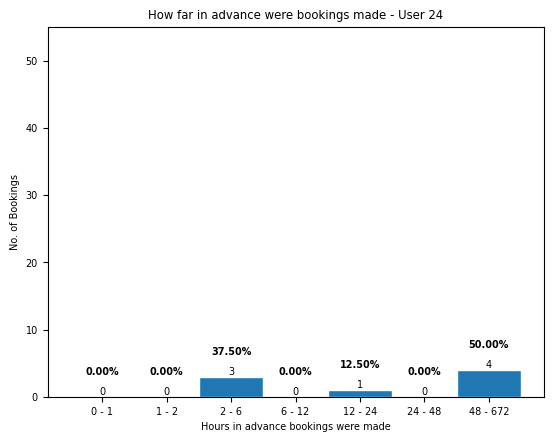

In [34]:
# Booking pattern for User 24

# How far in advance was a booking made in hours?
bookingsUser24['diff'] = (bookingsUser24['start'] - bookingsUser24['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser24['diff'],bins)

# make modified bookings histogram
modified_bookings_user_24 = bookingsUser24['diff'].where(bookingsUser24['modified_at'] > bookingsUser24['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_24, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 24")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser24)
print(total_bookings, 'bookings were made by User 24.')
print(modified_bookings_user_24.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 24 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 24
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)


plt.savefig('user_24_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

0 bookings were made by User 24 in the first week.


/var/folders/8_/t19tfm1d4gj320q9vpfcj_dr0000gn/T/ipykernel_25106/1075433493.py:48: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (height / total_bookings) * 100


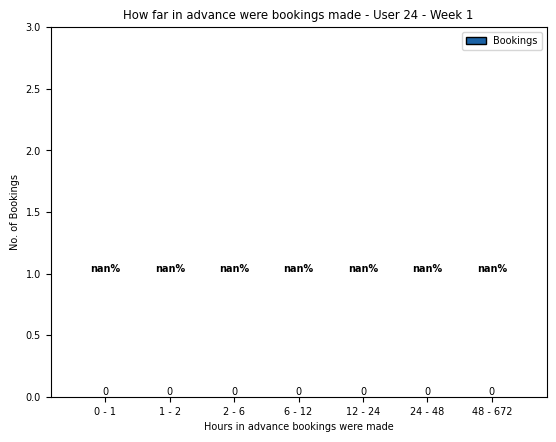

In [80]:
# Booking pattern for User 24 - Week 1

bookingsUser24Week1 = bookingsUser24[(bookingsUser24['created_at'] >= g4W1StartDate) & (bookingsUser24['created_at'] <= g4W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser24Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 24 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser24Week1)
print(total_bookings, 'bookings were made by User 24 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

7 bookings were made by User 24 in the second week.


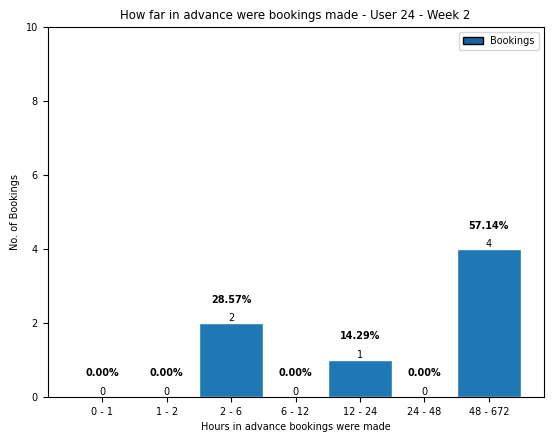

In [165]:
# Booking pattern for User 24 - Week 2

bookingsUser24Week2 = bookingsUser24[(bookingsUser24['created_at'] >= g4W2StartDate) & (bookingsUser24['created_at'] <= g4W2EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser24Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 24 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser24Week2)
print(total_bookings, 'bookings were made by User 24 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()


1 bookings were made by User 24 in the third week.


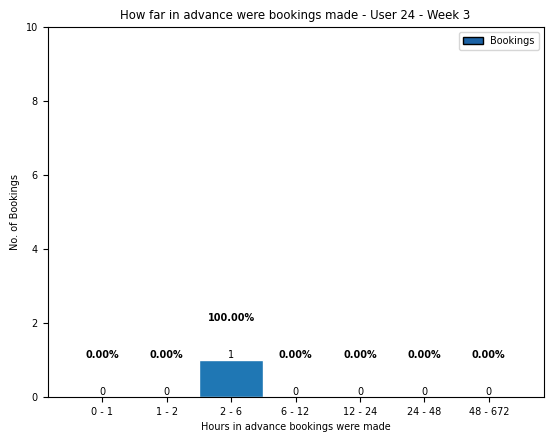

In [166]:
# Booking pattern for User 24 - Week 3

bookingsUser24Week3 = bookingsUser24[(bookingsUser24['created_at'] >= g4W3StartDate) & (bookingsUser24['created_at'] <= g4W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser24Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 24 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser24Week3)
print(total_bookings, 'bookings were made by User 24 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [28]:
# User 25

bookingsUser25 = bookings.loc[bookings['user'] == 25].copy()
bookingsUser25

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
298,2023-07-08 14:00:00+00:00,1800,oven (30min),,yes,0.08,8,electricity_consumption,25,2023-07-07 17:34:49+00:00,2023-07-07 17:34:49+00:00
301,2023-07-21 09:00:00+00:00,1800,kettle (30min),,yes,0.04,8,electricity_consumption,25,2023-07-19 23:12:27+00:00,2023-07-19 23:12:27+00:00
312,2023-07-22 10:00:00+00:00,7200,washing_and_drying (120min),,somewhat,0.29,8,electricity_consumption,25,2023-07-20 18:39:31+00:00,2023-07-20 18:39:31+00:00
313,2023-07-21 18:00:00+00:00,5400,meal_dinner (90min),,somewhat,0.16,8,electricity_consumption,25,2023-07-20 18:41:16+00:00,2023-07-20 18:41:16+00:00
318,2023-07-24 14:00:00+00:00,3600,oven (30min),,somewhat,0.08,8,electricity_consumption,25,2023-07-24 06:07:11+00:00,2023-07-24 06:07:11+00:00
323,2023-07-24 17:00:00+00:00,3600,oven (60min),,yes,0.20,8,electricity_consumption,25,2023-07-24 14:29:42+00:00,2023-07-24 14:29:42+00:00
325,2023-07-25 17:00:00+00:00,1800,oven (30min),,yes,0.08,8,electricity_consumption,25,2023-07-25 08:34:41+00:00,2023-07-25 08:34:41+00:00
327,2023-07-26 16:00:00+00:00,1800,oven (30min),,no,0.08,8,electricity_consumption,25,2023-07-26 13:01:44+00:00,2023-07-26 13:01:44+00:00


8 bookings were made by User 25.
0 of those bookings were modified.


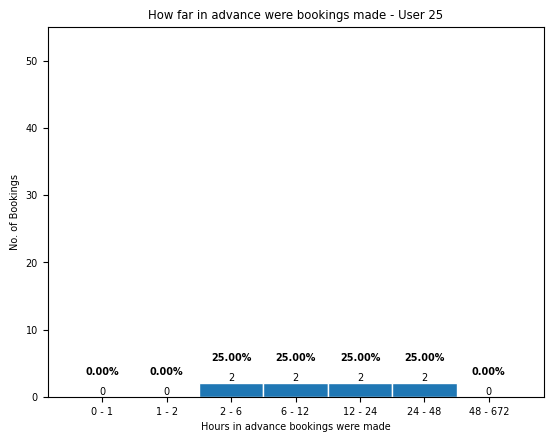

In [33]:
# Booking pattern for User 25

# How far in advance was a booking made in hours?
bookingsUser25['diff'] = (bookingsUser25['start'] - bookingsUser25['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser25['diff'],bins)

# make modified bookings histogram
modified_bookings_user_25 = bookingsUser25['diff'].where(bookingsUser25['modified_at'] > bookingsUser25['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_25, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 25")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser25)
print(total_bookings, 'bookings were made by User 25.')
print(modified_bookings_user_25.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 25 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 25
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('user_25_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

1 bookings were made by User 25 in the first week.


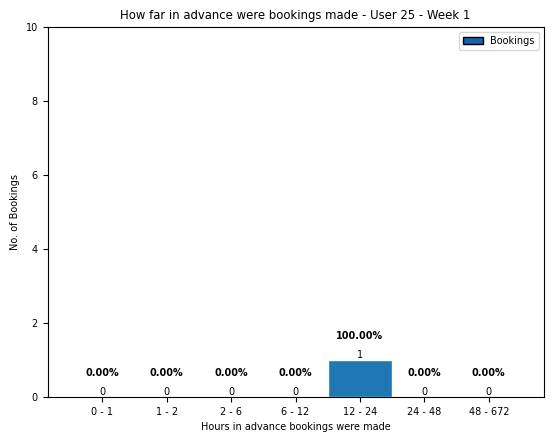

In [171]:
# Booking pattern for User 25 - Week 1

bookingsUser25Week1 = bookingsUser25[(bookingsUser25['created_at'] >= g4W1StartDate) & (bookingsUser25['created_at'] <= g4W1EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser25Week1['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 25 - Week 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser25Week1)
print(total_bookings, 'bookings were made by User 25 in the first week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

3 bookings were made by User 25 in the second week.


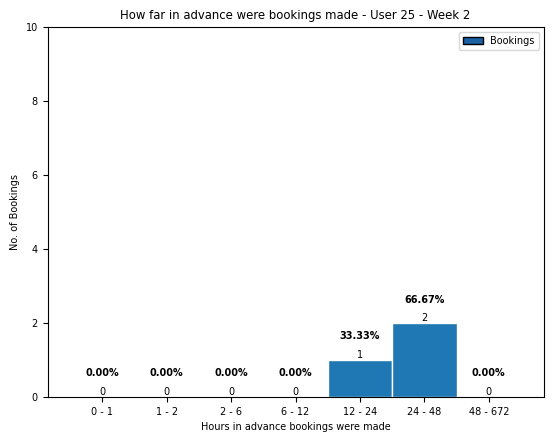

In [172]:

# Booking pattern for User 25 - Week 2

bookingsUser25Week2 = bookingsUser25[(bookingsUser25['created_at'] >= g4W2StartDate) & (bookingsUser25['created_at'] <= g4W2EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser25Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 25 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser25Week2)
print(total_bookings, 'bookings were made by User 25 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

4 bookings were made by User 25 in the third week.


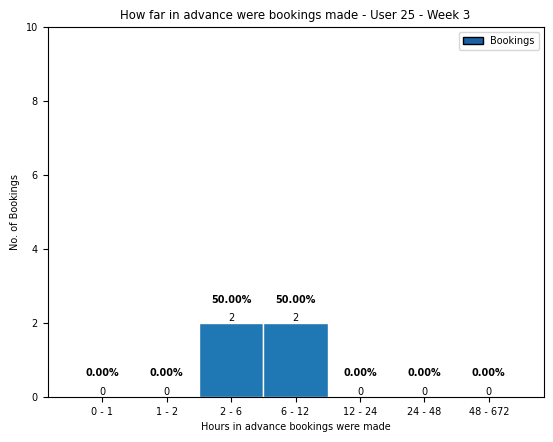

In [174]:
# Booking pattern for User 25 - Week 3

bookingsUser25Week3 = bookingsUser25[(bookingsUser25['created_at'] >= g4W3StartDate) & (bookingsUser25['created_at'] <= g4W3EndDate)]

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser25Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 25 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser25Week3)
print(total_bookings, 'bookings were made by User 25 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [30]:
# User 28

bookingsUser28 = bookings.loc[bookings['user'] == 28].copy()
bookingsUser28

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
299,2023-07-20 08:00:00+00:00,3600,washing_and_drying (60min),,yes,0.34,16,electricity_consumption,28,2023-07-19 19:10:16+00:00,2023-07-19 19:10:16+00:00
300,2023-07-20 09:00:00+00:00,1800,toaster (30min),,yes,0.07,16,electricity_consumption,28,2023-07-19 19:19:44+00:00,2023-07-19 19:19:44+00:00
302,2023-07-20 14:00:00+00:00,1800,other (30min),making smoothies,yes,0.39,16,electricity_consumption,28,2023-07-20 11:16:33+00:00,2023-07-20 11:16:33+00:00
305,2023-07-21 08:00:00+00:00,1800,meal_dinner (30min),,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:33+00:00,2023-07-20 16:28:33+00:00
306,2023-07-22 08:00:00+00:00,3600,Other,,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:47+00:00,2023-07-20 16:28:47+00:00
314,2023-07-22 09:00:00+00:00,1800,hob (30min),,yes,0.10,16,electricity_consumption,28,2023-07-21 08:03:24+00:00,2023-07-21 08:03:24+00:00
315,2023-07-22 09:00:00+00:00,1800,hob (30min),,yes,0.10,16,electricity_consumption,28,2023-07-21 08:03:48+00:00,2023-07-21 08:03:48+00:00
316,2023-07-23 17:00:00+00:00,3600,washing_and_drying (60min),Got wine over everything,yes,0.34,16,electricity_consumption,28,2023-07-23 15:30:33+00:00,2023-07-23 15:30:33+00:00
319,2023-07-25 13:00:00+00:00,1800,hob (30min),,yes,0.10,16,electricity_consumption,28,2023-07-24 12:53:21+00:00,2023-07-24 12:53:21+00:00
320,2023-07-25 13:00:00+00:00,1800,oven (30min),,yes,0.40,16,electricity_consumption,28,2023-07-24 12:53:30+00:00,2023-07-24 12:53:30+00:00


12 bookings were made by User 28.
0 of those bookings were modified.


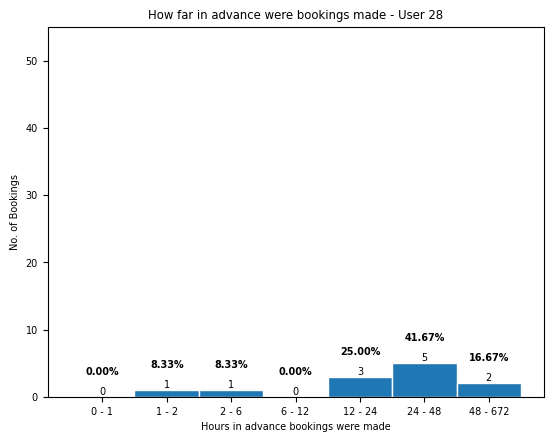

In [32]:
# Booking pattern for User 28

# How far in advance was a booking made in hours?
bookingsUser28['diff'] = (bookingsUser28['start'] - bookingsUser28['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser28['diff'],bins)

# make modified bookings histogram
modified_bookings_user_28 = bookingsUser28['diff'].where(bookingsUser28['modified_at'] > bookingsUser28['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_28, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 28")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser28)
print(total_bookings, 'bookings were made by User 28.')
print(modified_bookings_user_28.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 28 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings in user 28
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() # this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

# plt.show()
plt.savefig('user_28_booking_histogram.png', dpi=300, bbox_inches='tight')

In [103]:
# Booking pattern for User 28 - Week 1

bookingsUser28Week1 = bookingsUser28[(bookingsUser28['created_at'] >= g4W1StartDate) & (bookingsUser28['created_at'] <= g4W1EndDate)]

print(len(bookingsUser28Week1), 'bookings were made by User 28 in the first week.')



0 bookings were made by User 28 in the first week.


,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
299,2023-07-20 08:00:00+00:00,3600,washing_and_drying (60min),,yes,0.34,16,electricity_consumption,28,2023-07-19 19:10:16+00:00,2023-07-19 19:10:16+00:00,12.828889
300,2023-07-20 09:00:00+00:00,1800,toaster (30min),,yes,0.07,16,electricity_consumption,28,2023-07-19 19:19:44+00:00,2023-07-19 19:19:44+00:00,13.671111
302,2023-07-20 14:00:00+00:00,1800,other (30min),making smoothies,yes,0.39,16,electricity_consumption,28,2023-07-20 11:16:33+00:00,2023-07-20 11:16:33+00:00,2.724167
305,2023-07-21 08:00:00+00:00,1800,meal_dinner (30min),,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:33+00:00,2023-07-20 16:28:33+00:00,15.524167
306,2023-07-22 08:00:00+00:00,3600,Other,,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:47+00:00,2023-07-20 16:28:47+00:00,39.520278
314,2023-07-22 09:00:00+00:00,1800,hob (30min),,yes,0.10,16,electricity_consumption,28,2023-07-21 08:03:24+00:00,2023-07-21 08:03:24+00:00,24.943333
315,2023-07-22 09:00:00+00:00,1800,hob (30min),,yes,0.10,16,electricity_consumption,28,2023-07-21 08:03:48+00:00,2023-07-21 08:03:48+00:00,24.936667


7 bookings were made by User 28 in the second week.


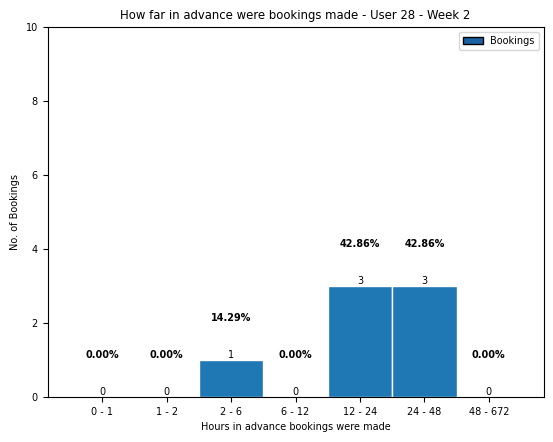

In [178]:
# Booking pattern for User 28 - Week 2

bookingsUser28Week2 = bookingsUser28[(bookingsUser28['created_at'] >= g4W2StartDate) & (bookingsUser28['created_at'] < g4W3StartDate)]
display(bookingsUser28Week2)

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser28Week2['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 28 - Week 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser28Week2)
print(total_bookings, 'bookings were made by User 28 in the second week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
316,2023-07-23 17:00:00+00:00,3600,washing_and_drying (60min),Got wine over everything,yes,0.34,16,electricity_consumption,28,2023-07-23 15:30:33+00:00,2023-07-23 15:30:33+00:00,1.490833
319,2023-07-25 13:00:00+00:00,1800,hob (30min),,yes,0.10,16,electricity_consumption,28,2023-07-24 12:53:21+00:00,2023-07-24 12:53:21+00:00,24.110833
320,2023-07-25 13:00:00+00:00,1800,oven (30min),,yes,0.40,16,electricity_consumption,28,2023-07-24 12:53:30+00:00,2023-07-24 12:53:30+00:00,24.108333
321,2023-07-26 13:00:00+00:00,1800,oven (30min),,yes,0.40,16,electricity_consumption,28,2023-07-24 12:53:46+00:00,2023-07-24 12:53:46+00:00,48.103889
322,2023-07-27 13:00:00+00:00,1800,oven (30min),,yes,0.40,16,electricity_consumption,28,2023-07-24 12:54:19+00:00,2023-07-24 12:54:19+00:00,72.094722


5 bookings were made by User 28 in the third week.


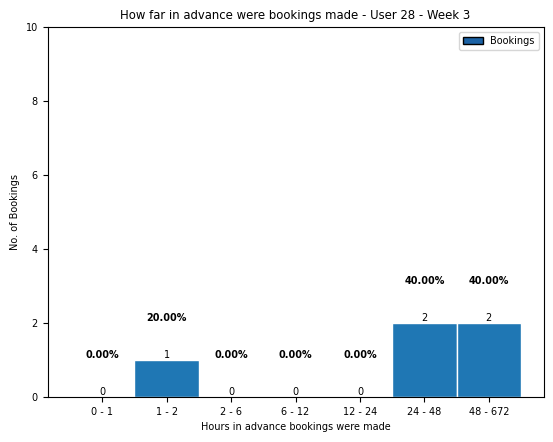

In [179]:
# Booking pattern for User 28 - Week 3

bookingsUser28Week3 = bookingsUser28[(bookingsUser28['created_at'] >= g4W3StartDate) & (bookingsUser28['created_at'] <= g4W3EndDate)]

display(bookingsUser28Week3)

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser28Week3['diff'],bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 28 - Week 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser28Week3)
print(total_bookings, 'bookings were made by User 28 in the third week.')

# Add the y-axis value at the top of each bin
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [19]:
# User 29

bookingsUser29 = bookings.loc[bookings['user'] == 29].copy()
bookingsUser29

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at


0 bookings were made by User 29.
0 of those bookings were modified.


/var/folders/8_/t19tfm1d4gj320q9vpfcj_dr0000gn/T/ipykernel_1326/2395492162.py:58: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (height / total_bookings) * 100


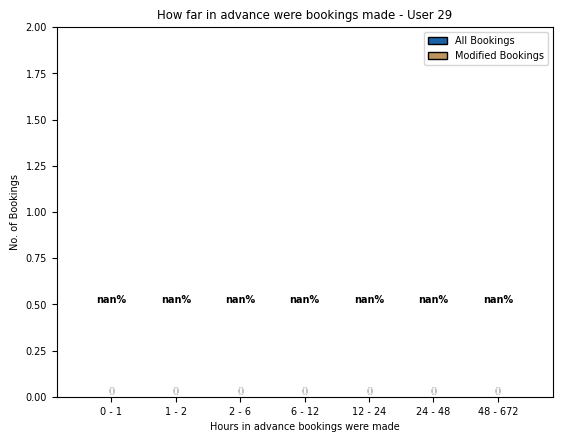

In [20]:
# Booking pattern for User 29

# How far in advance was a booking made in hours?
bookingsUser29['diff'] = (bookingsUser29['start'] - bookingsUser29['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser29['diff'],bins)

# make modified bookings histogram
modified_bookings_user_29 = bookingsUser29['diff'].where(bookingsUser29['modified_at'] > bookingsUser29['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_29, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - User 29")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser29)
print(total_bookings, 'bookings were made by User 29.')
print(modified_bookings_user_29.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 29 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 29
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 55  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [78]:
# Do people book at the same times / are there overlapping bookings? 
# Or do users shy away from booking at the same time as others? 

# Group 4

g4Bookings = bookings.loc[bookings['user'].isin(group4)].copy()
# print(len(g4Bookings))

# Group by hour and count overlaps
hourly_overlap_per_day_g4 = g4Bookings.groupby([g4Bookings['start'].dt.date, g4Bookings['start'].dt.hour])['user'].nunique()

count_occurrences = hourly_overlap_per_day_g4.value_counts().sort_index()
print(count_occurrences)

with pd.option_context('display.max_rows', None):
    display(hourly_overlap_per_day_g4)

1    24
2     1
Name: user, dtype: int64


start       start
2023-07-08  14       1
2023-07-20  8        1
            9        1
            14       2
            18       1
2023-07-21  8        1
            9        1
            14       1
            18       1
2023-07-22  8        1
            9        1
            10       1
2023-07-23  17       1
2023-07-24  8        1
            10       1
            13       1
            14       1
            15       1
            17       1
2023-07-25  9        1
            13       1
            17       1
2023-07-26  13       1
            16       1
2023-07-27  13       1
Name: user, dtype: int64